# HELP International Clustering

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

## Problem Statement 

Identify top countries that are direst need of aid. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Steps to be performed :

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
4. Final analysis and reco

# 1. Read and Understand the data

In [129]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
# read the dataset
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [132]:
df.info() #check df for data type and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [133]:
df.describe() #check Statistical data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [134]:
df.shape #shape of the data frame 

(167, 10)

In [135]:
df['country'].value_counts() #checking the number of countries and if any country is duplicate 

Fiji           1
Switzerland    1
Kenya          1
Bangladesh     1
Argentina      1
              ..
Tonga          1
Colombia       1
Belgium        1
Gabon          1
Sri Lanka      1
Name: country, Length: 167, dtype: int64

#### **`There are a total of 167 countries in our data`**

# 2. Visualize Data 

### Preping data for visulaization and modelling

Changing the columns 'health', 'imports' and 'exports' from a percentage of Total GDPP into actual value of 'health', 'imports' and 'exports'.

In [136]:
#changing from percentage of total GDP to actual value  ((value*GDP)/100)
df['exports']=(df['exports']*df['gdpp'])/100
df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100

In [137]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [138]:
df.info() #check df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


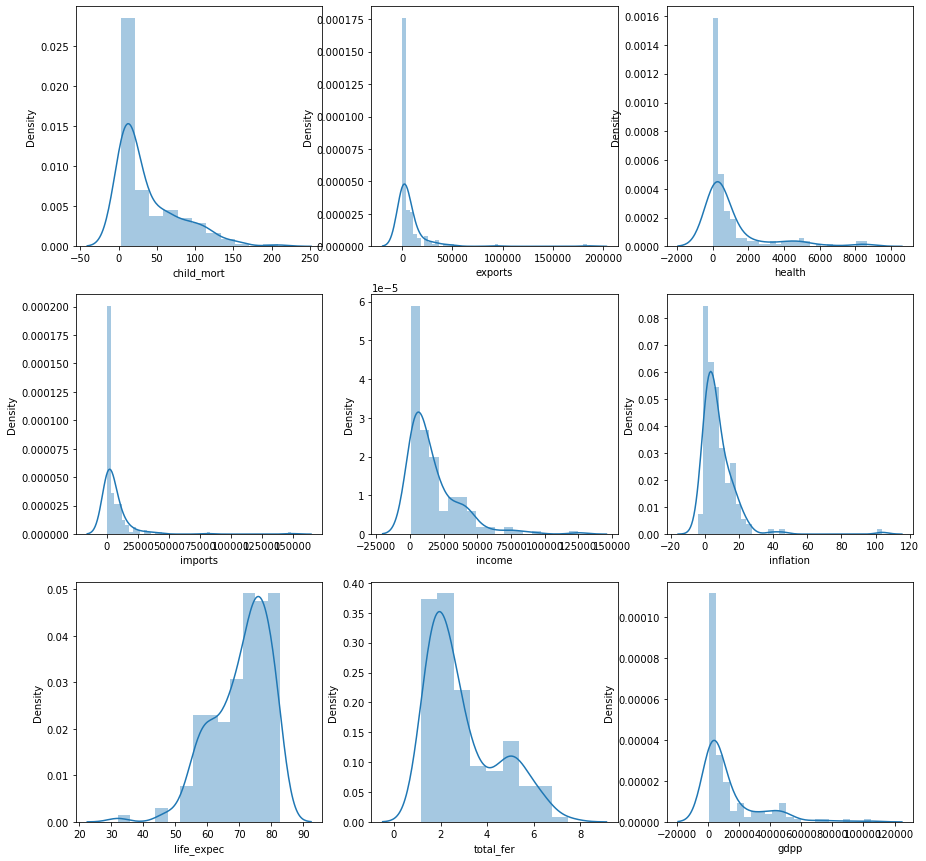

In [139]:
#UNIVARIANT ANALYSIS 

col = df.columns[1:] #picking all numeric columns (excluding countries)

plt.figure(figsize = (15,15)) #plot size
for i in enumerate(col): 
    plt.subplot(3,3,i[0]+1) #sublot for each variable
    sns.distplot(df[i[1]]) # dist plot for each variable 
    

### <font color=Red> INFERENCE
    - exports and imports are almost normally distributed with outliers in the upper range
    - child_mort, life_expec, total_fer, gdpp, health, inflation and income are not normally distributed and have more then 1 peaks and these contribute to the undertand similarity and difference in data contributed majorly to clustering.

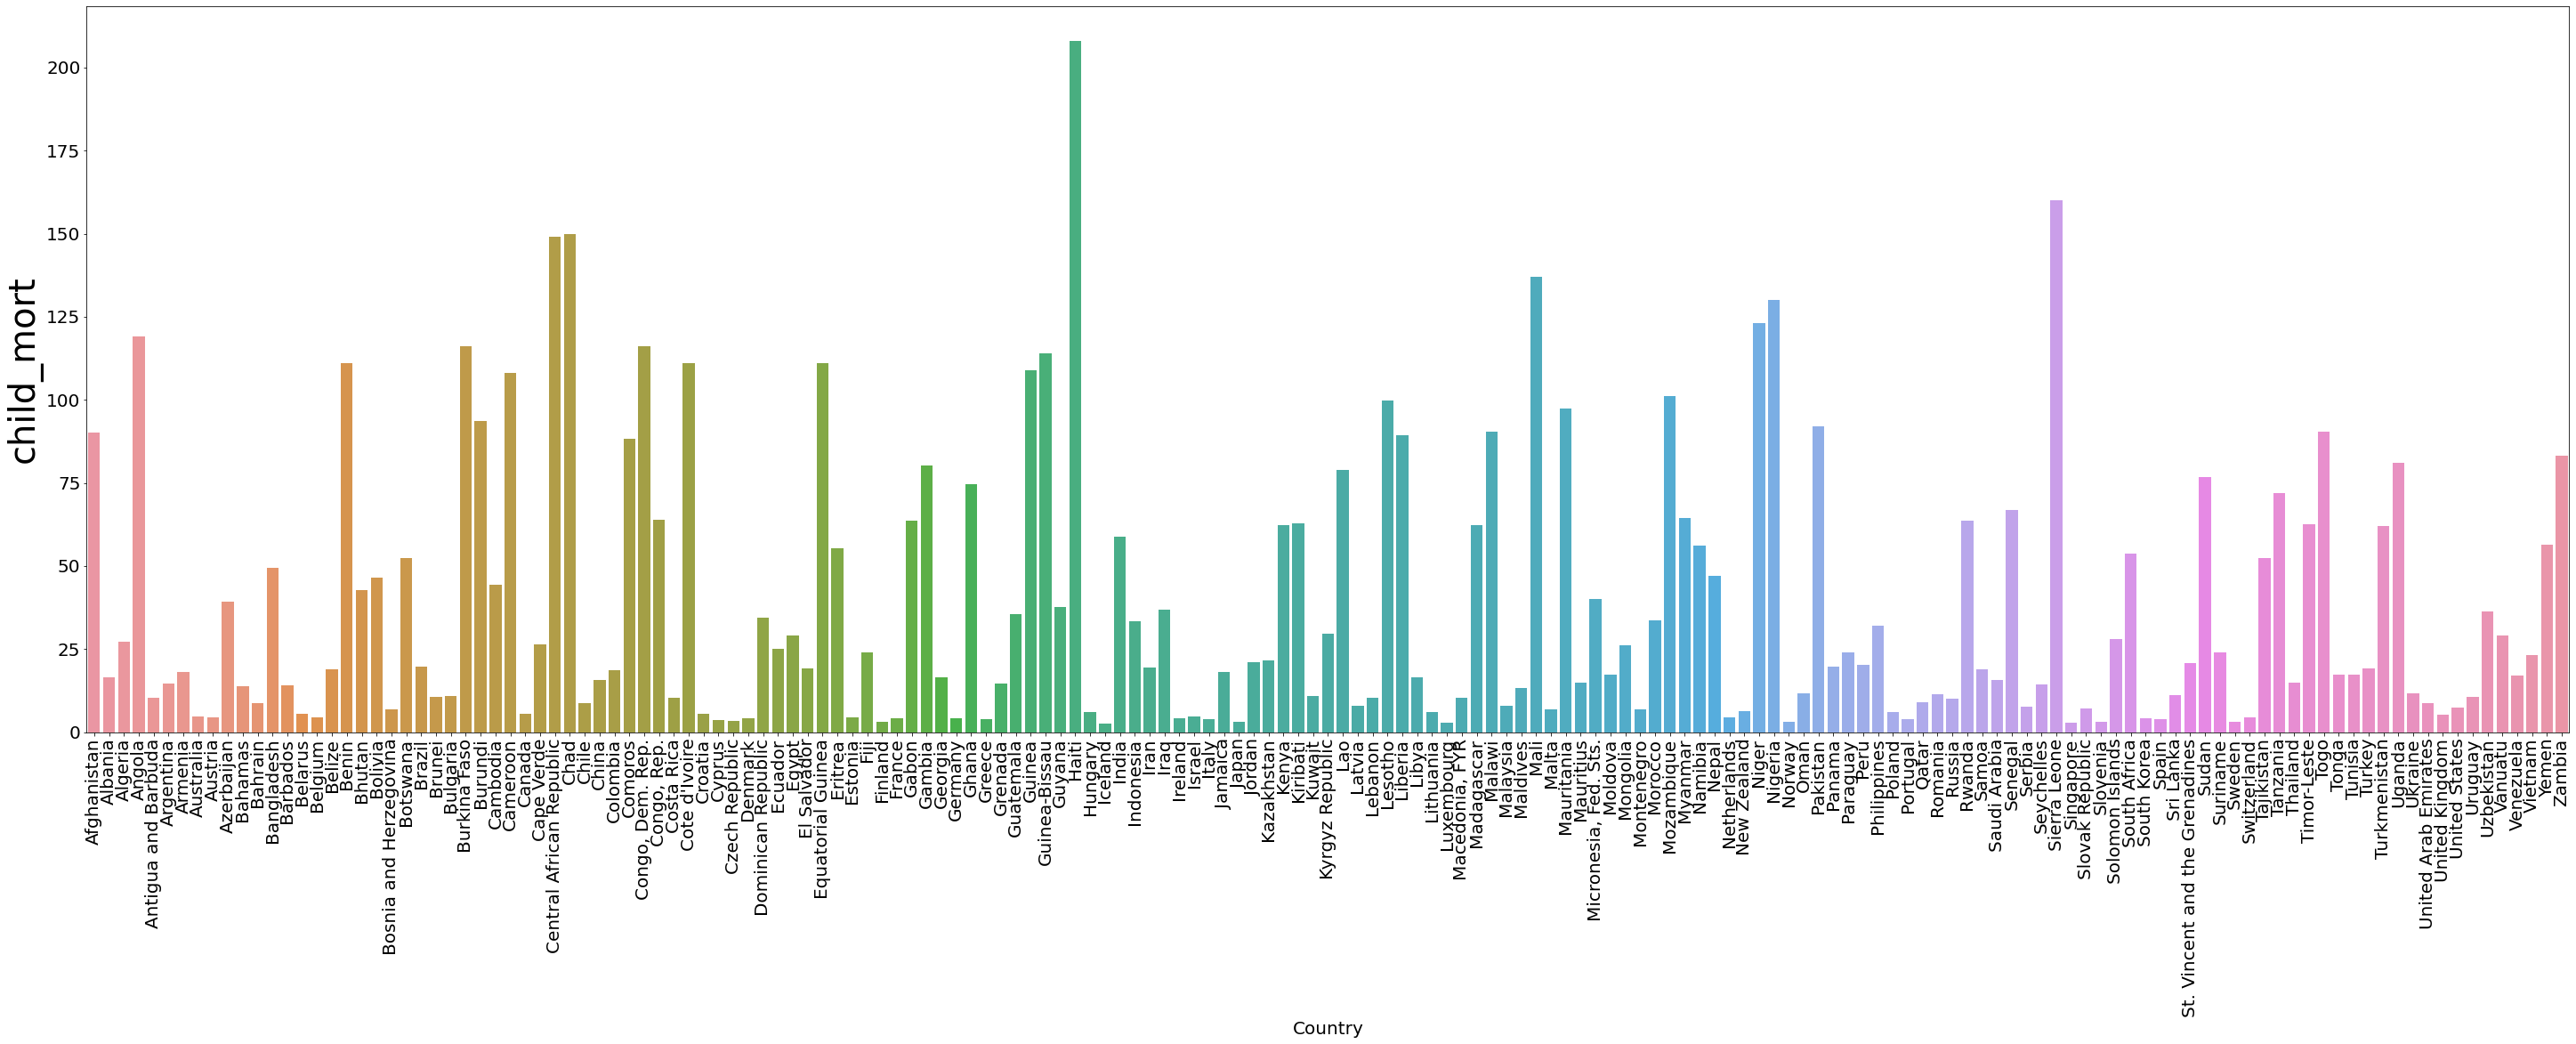

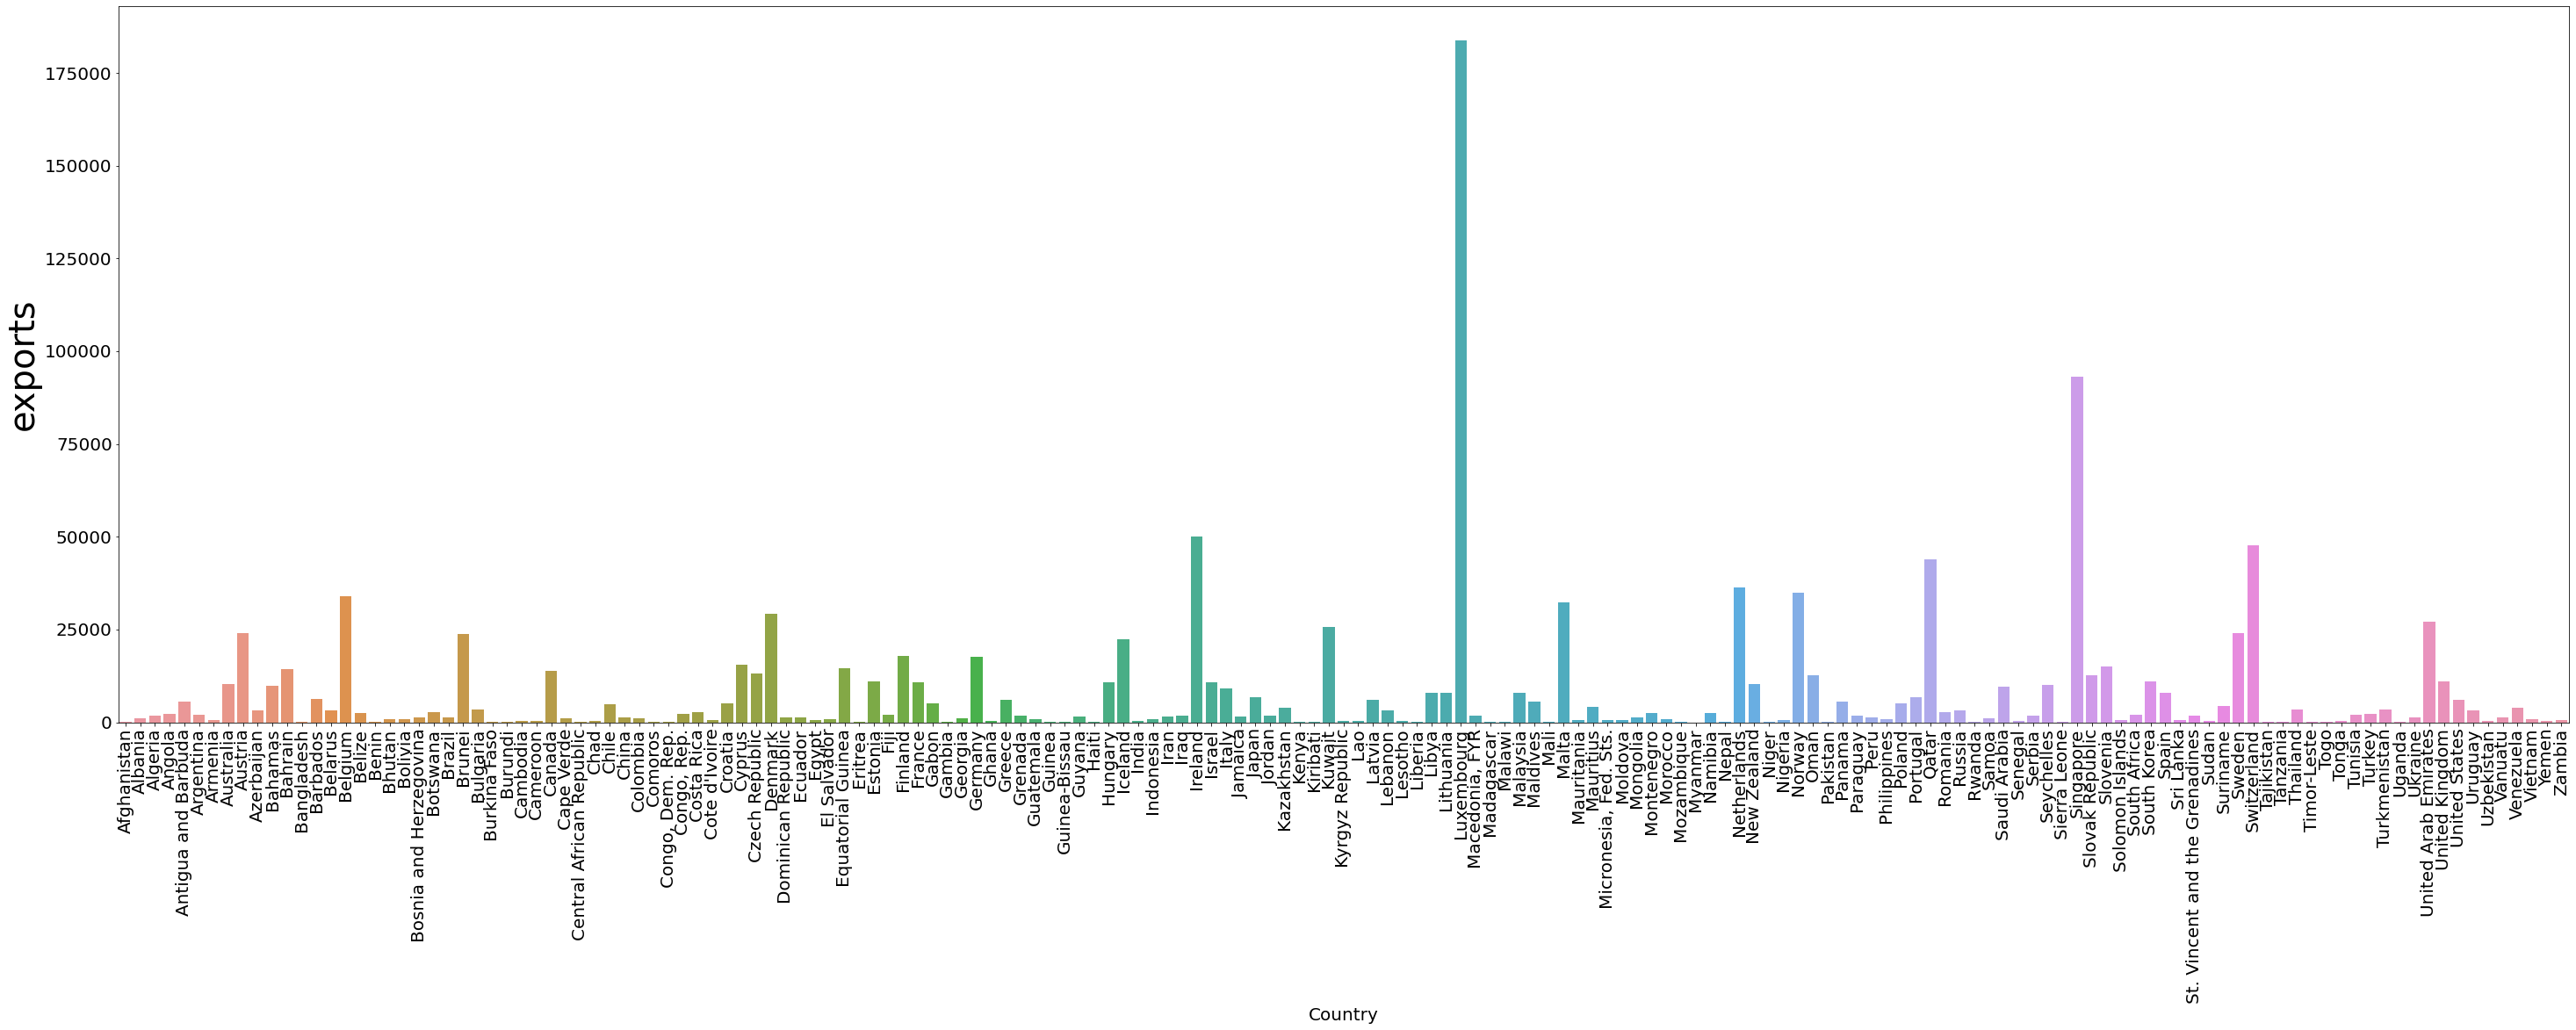

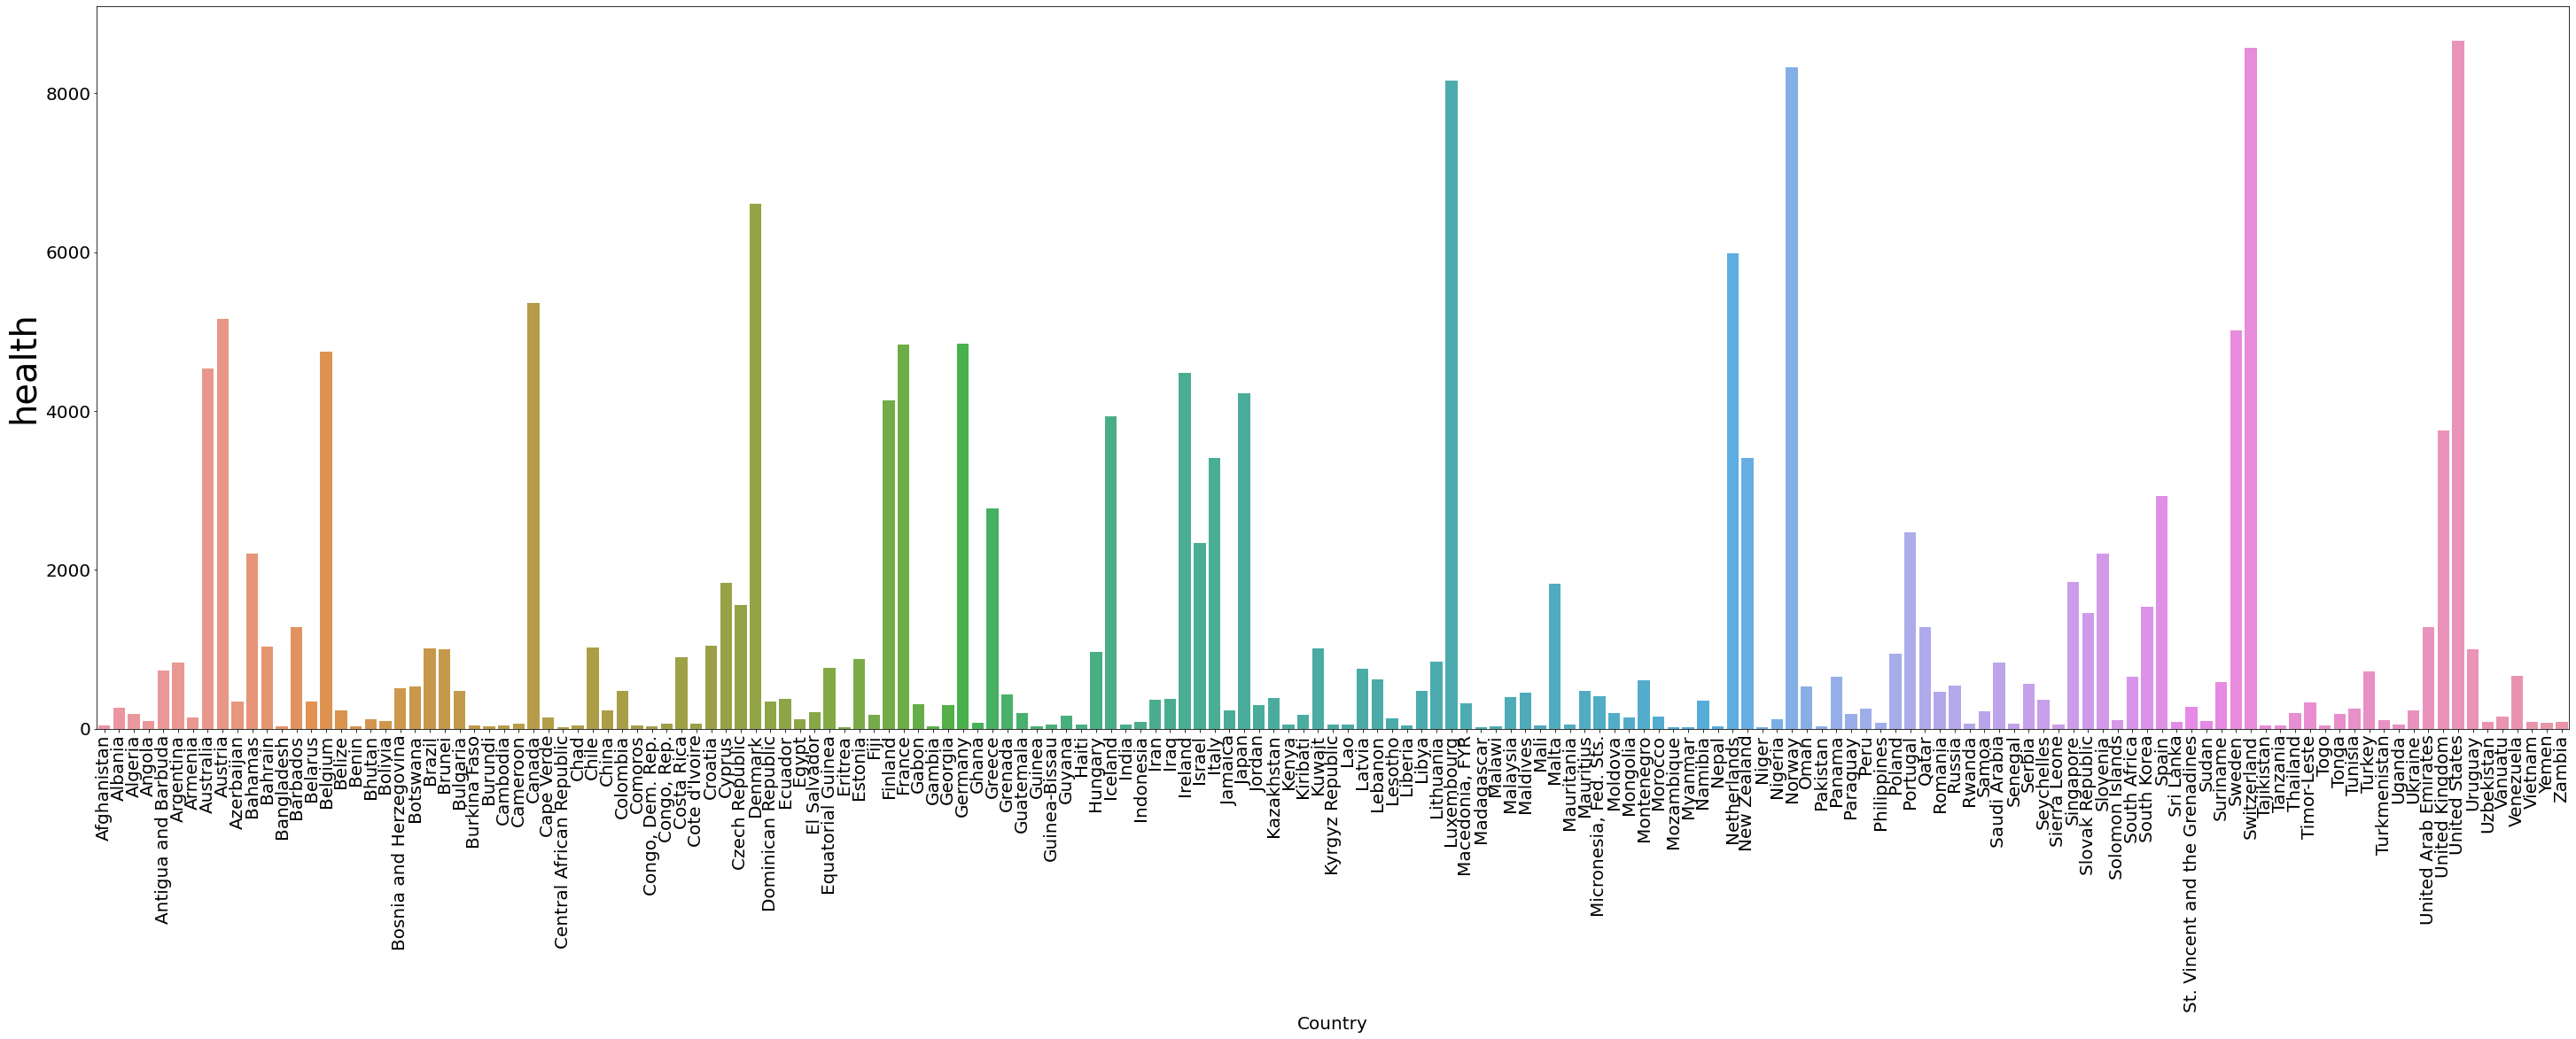

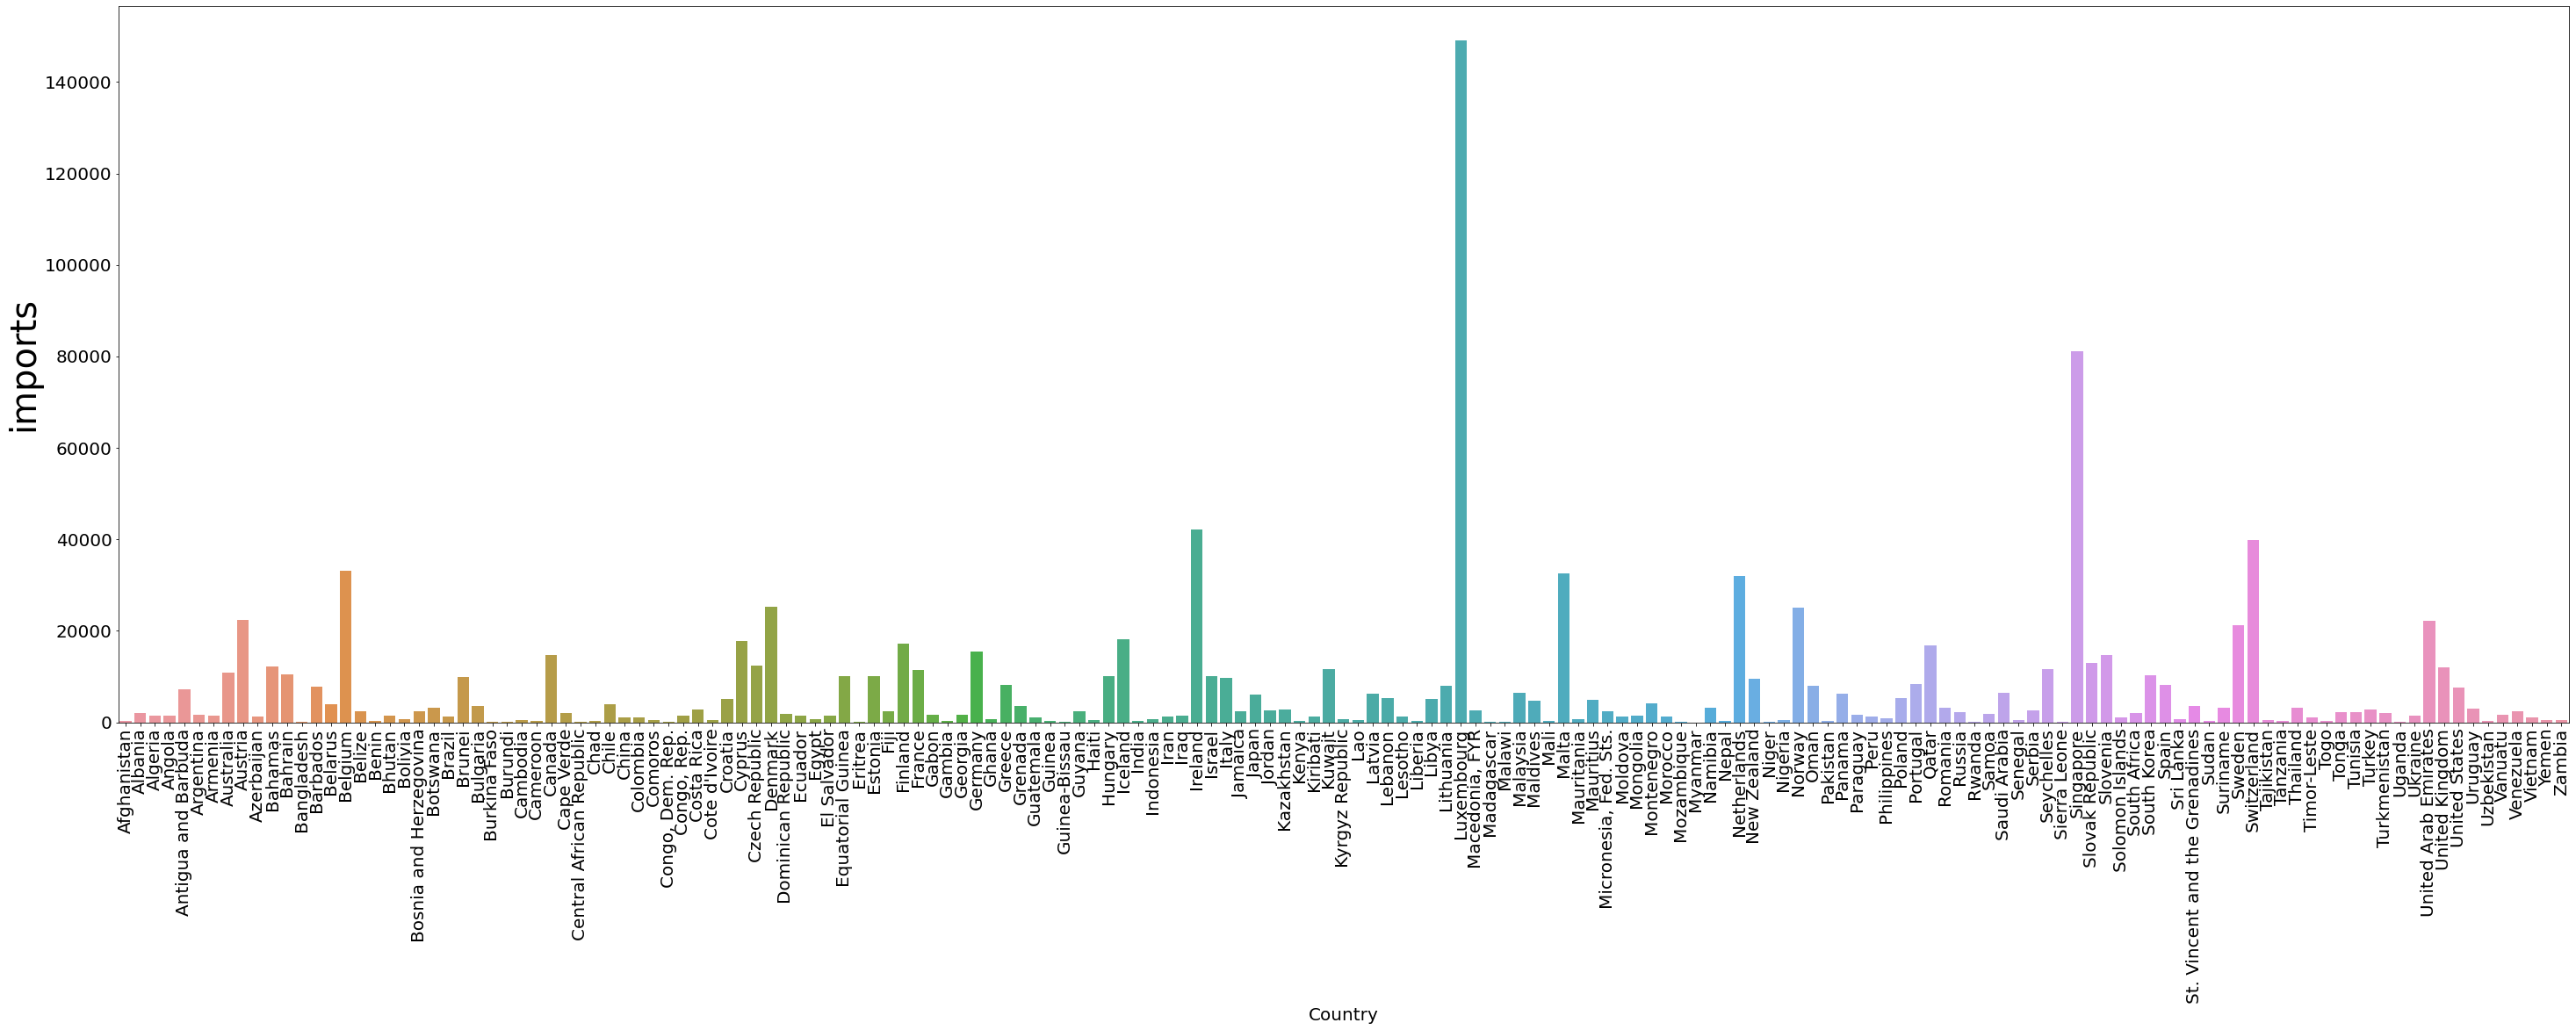

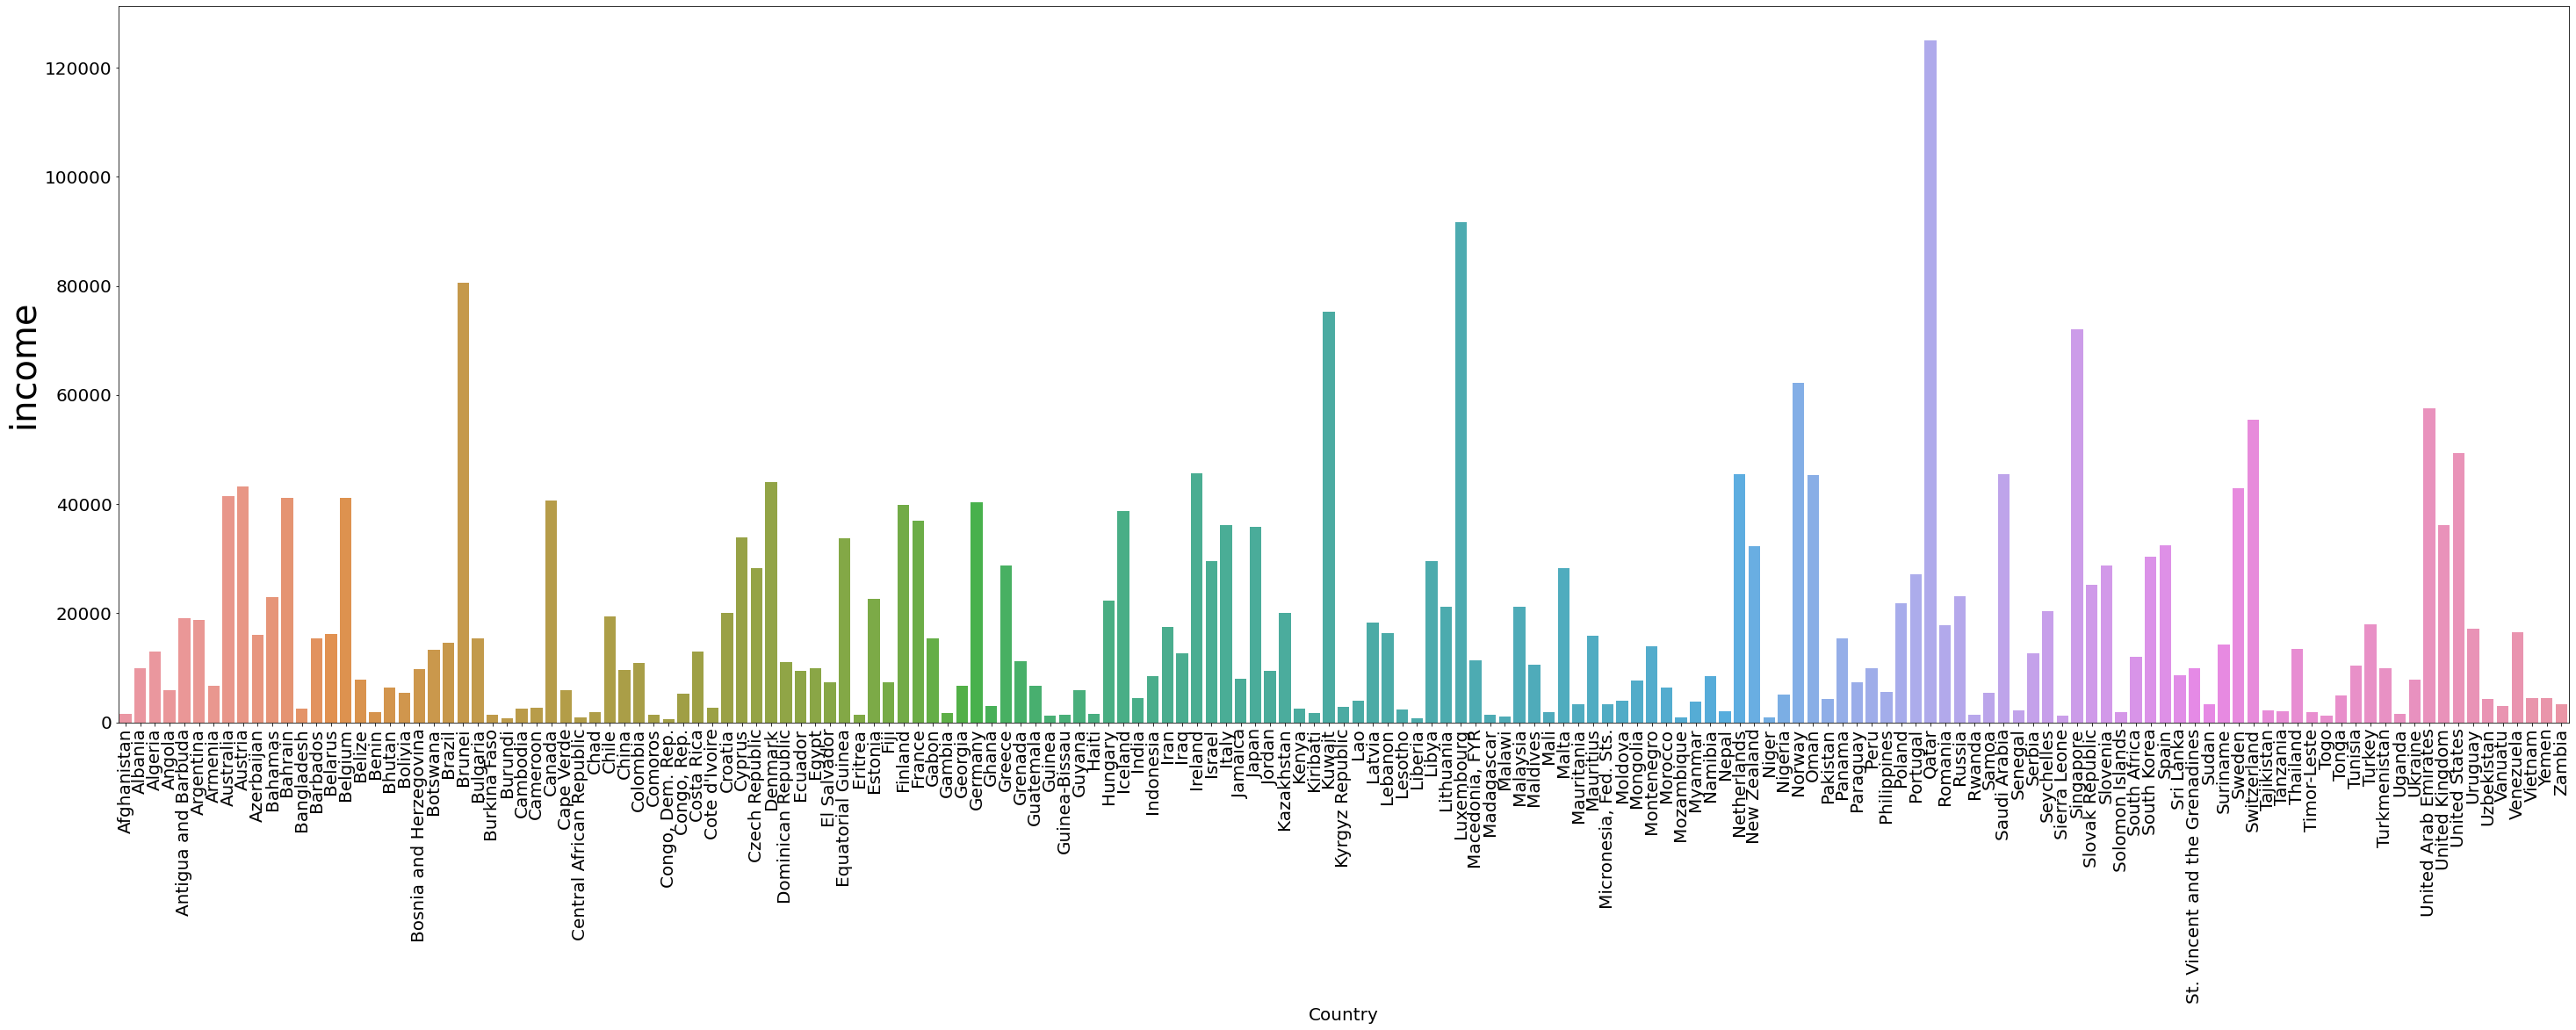

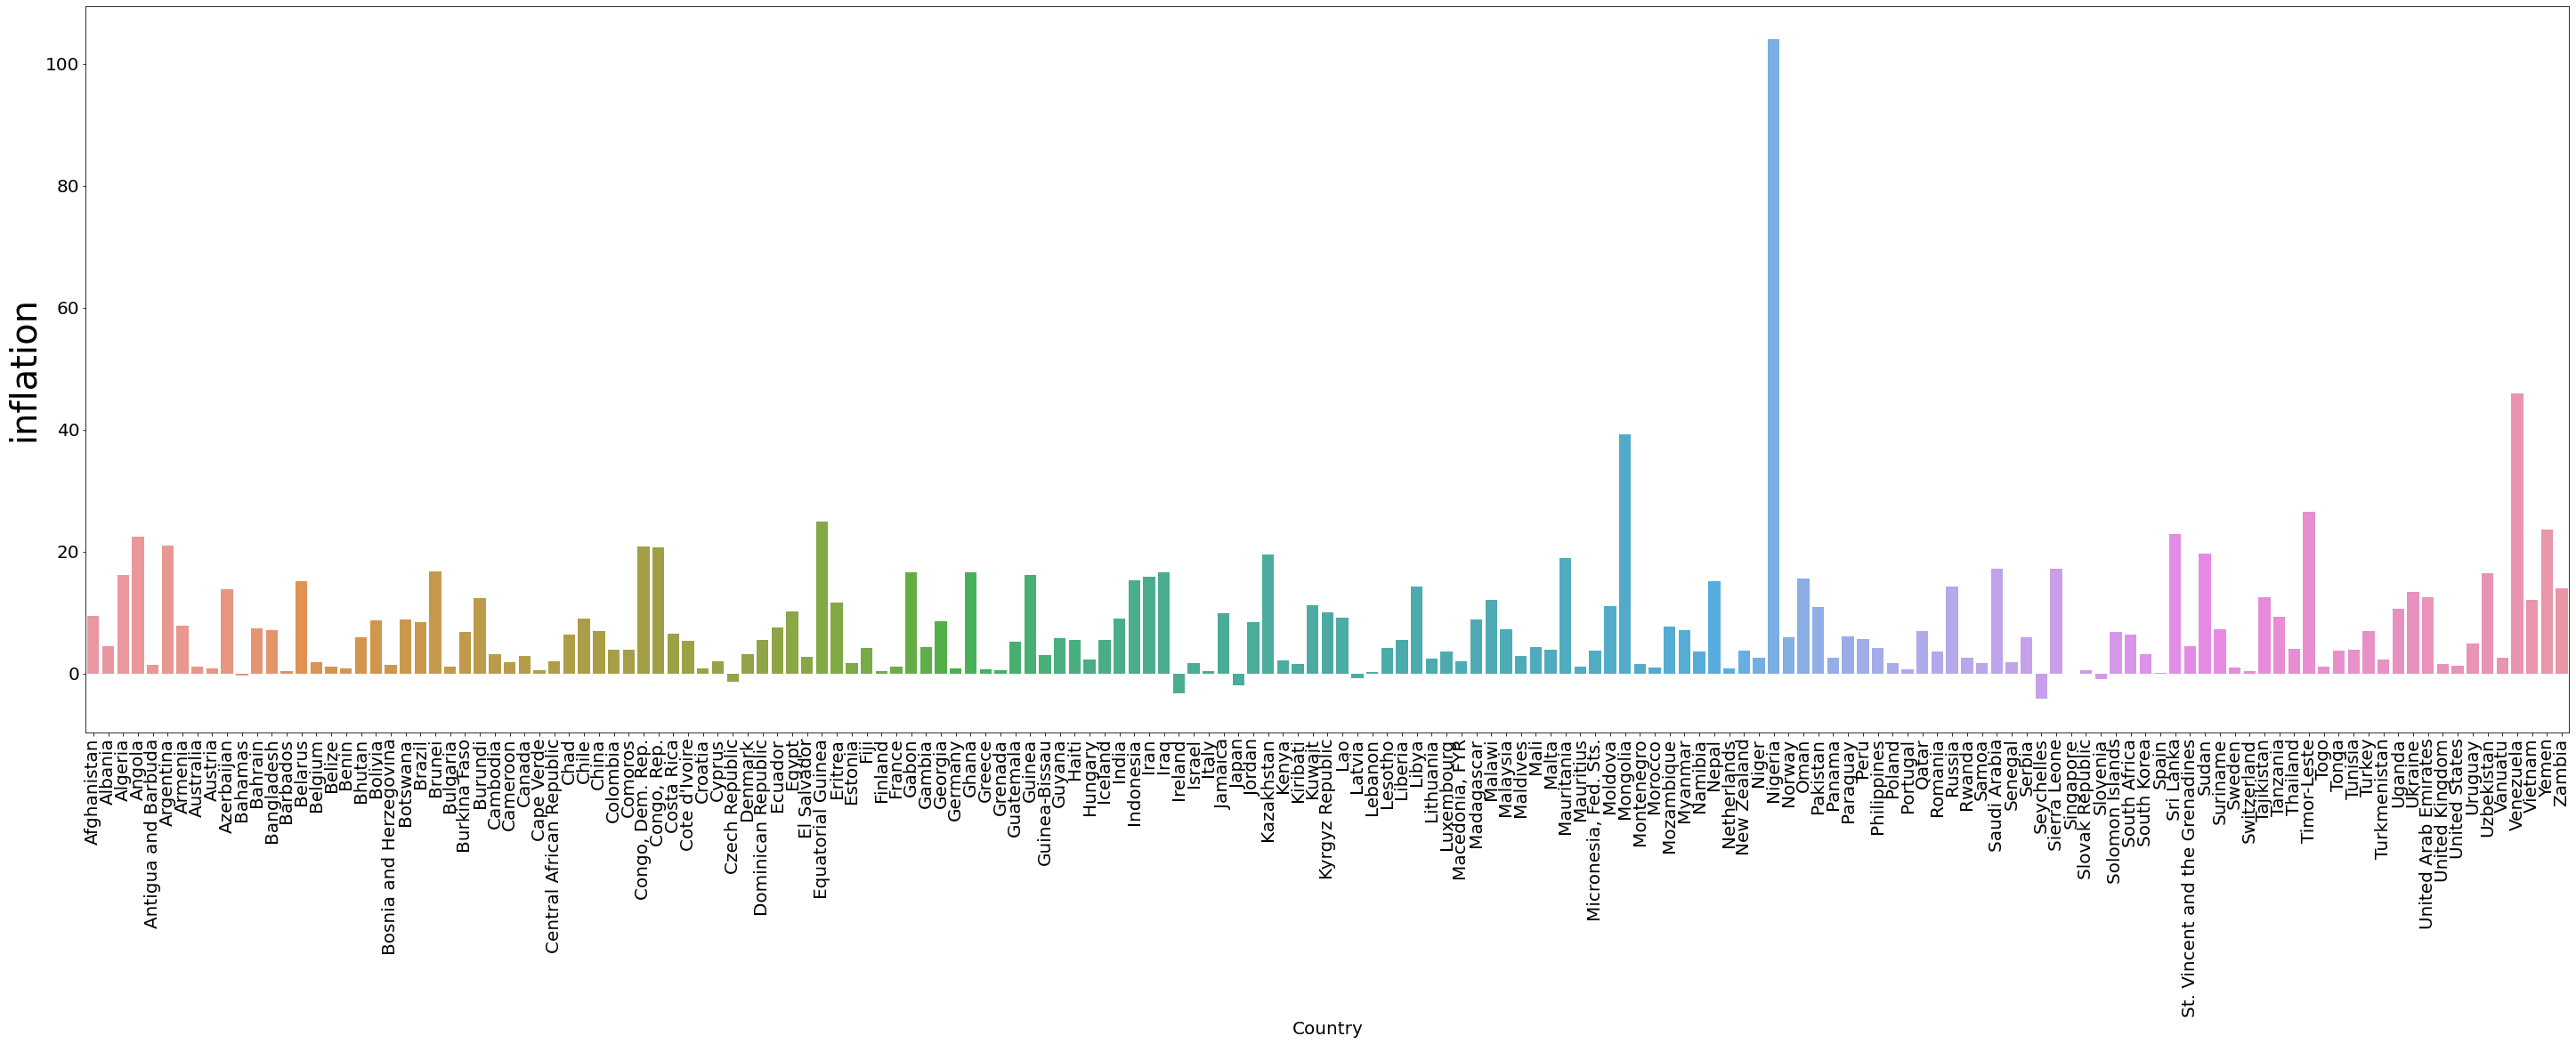

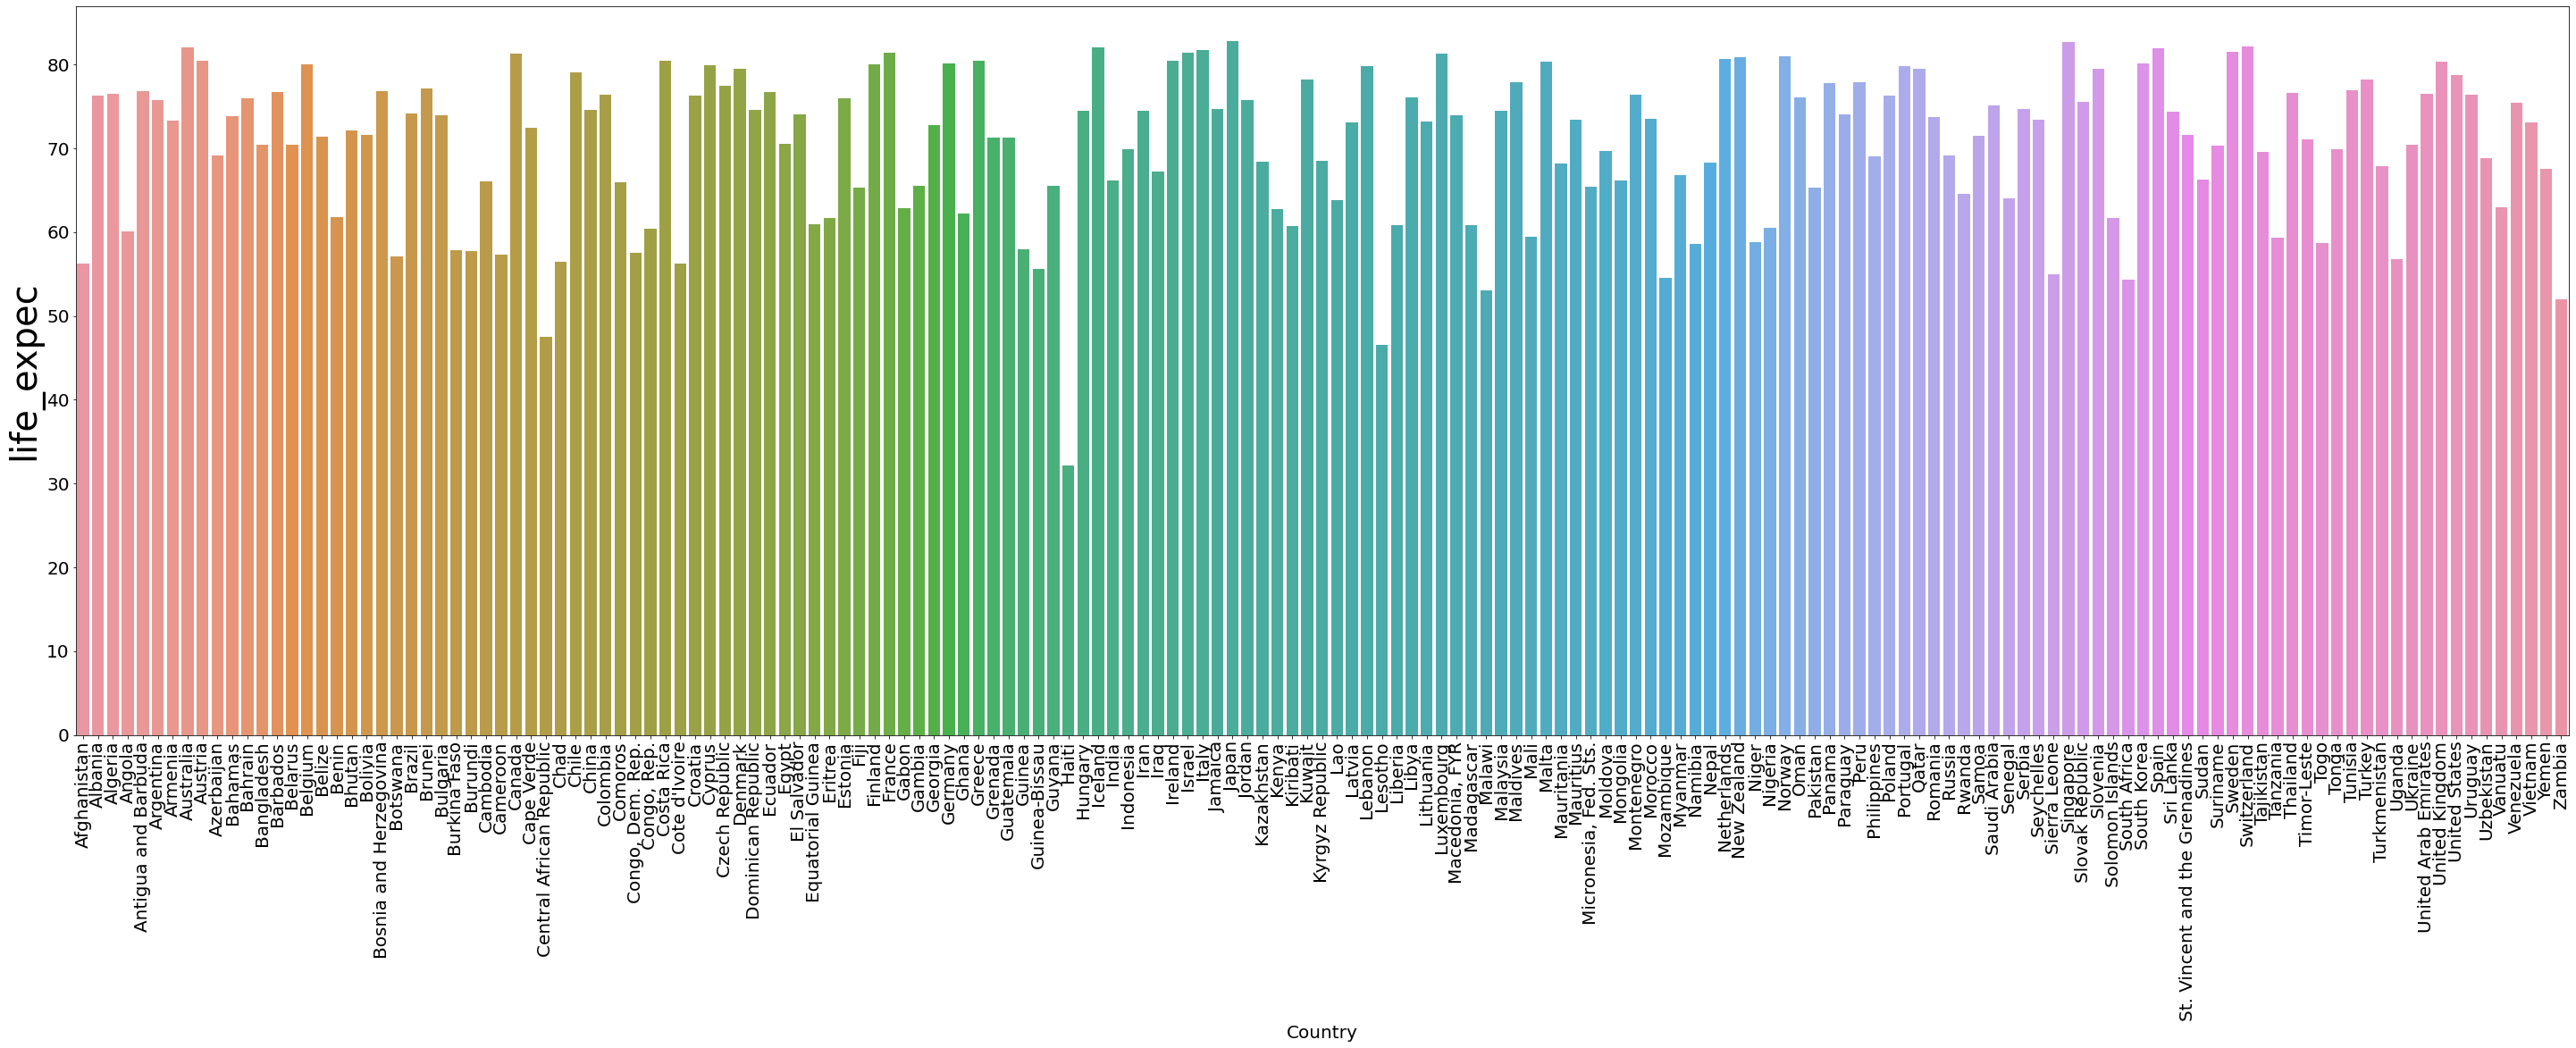

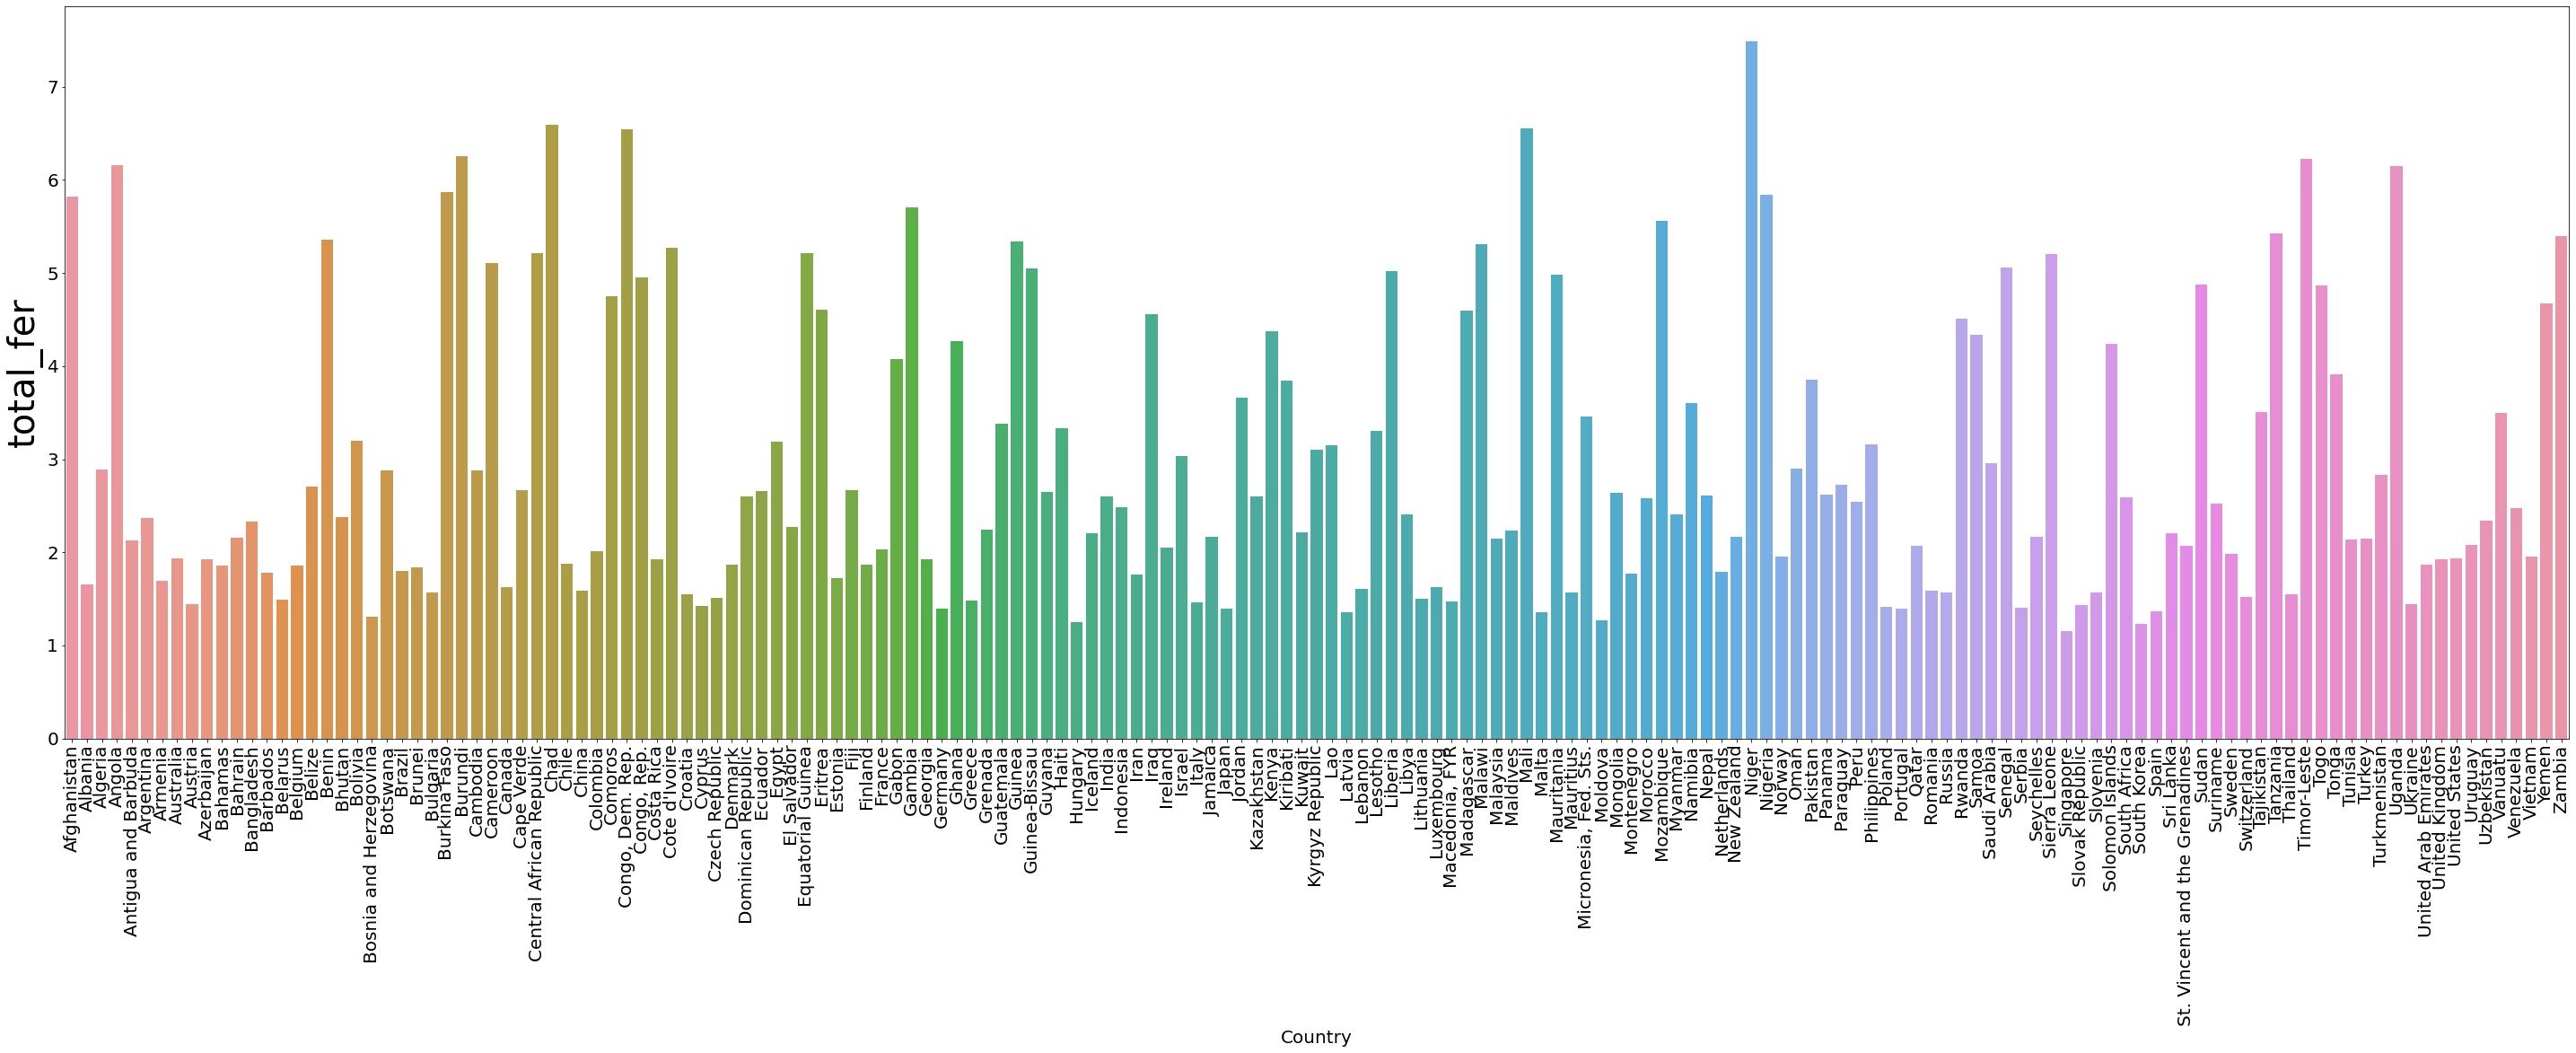

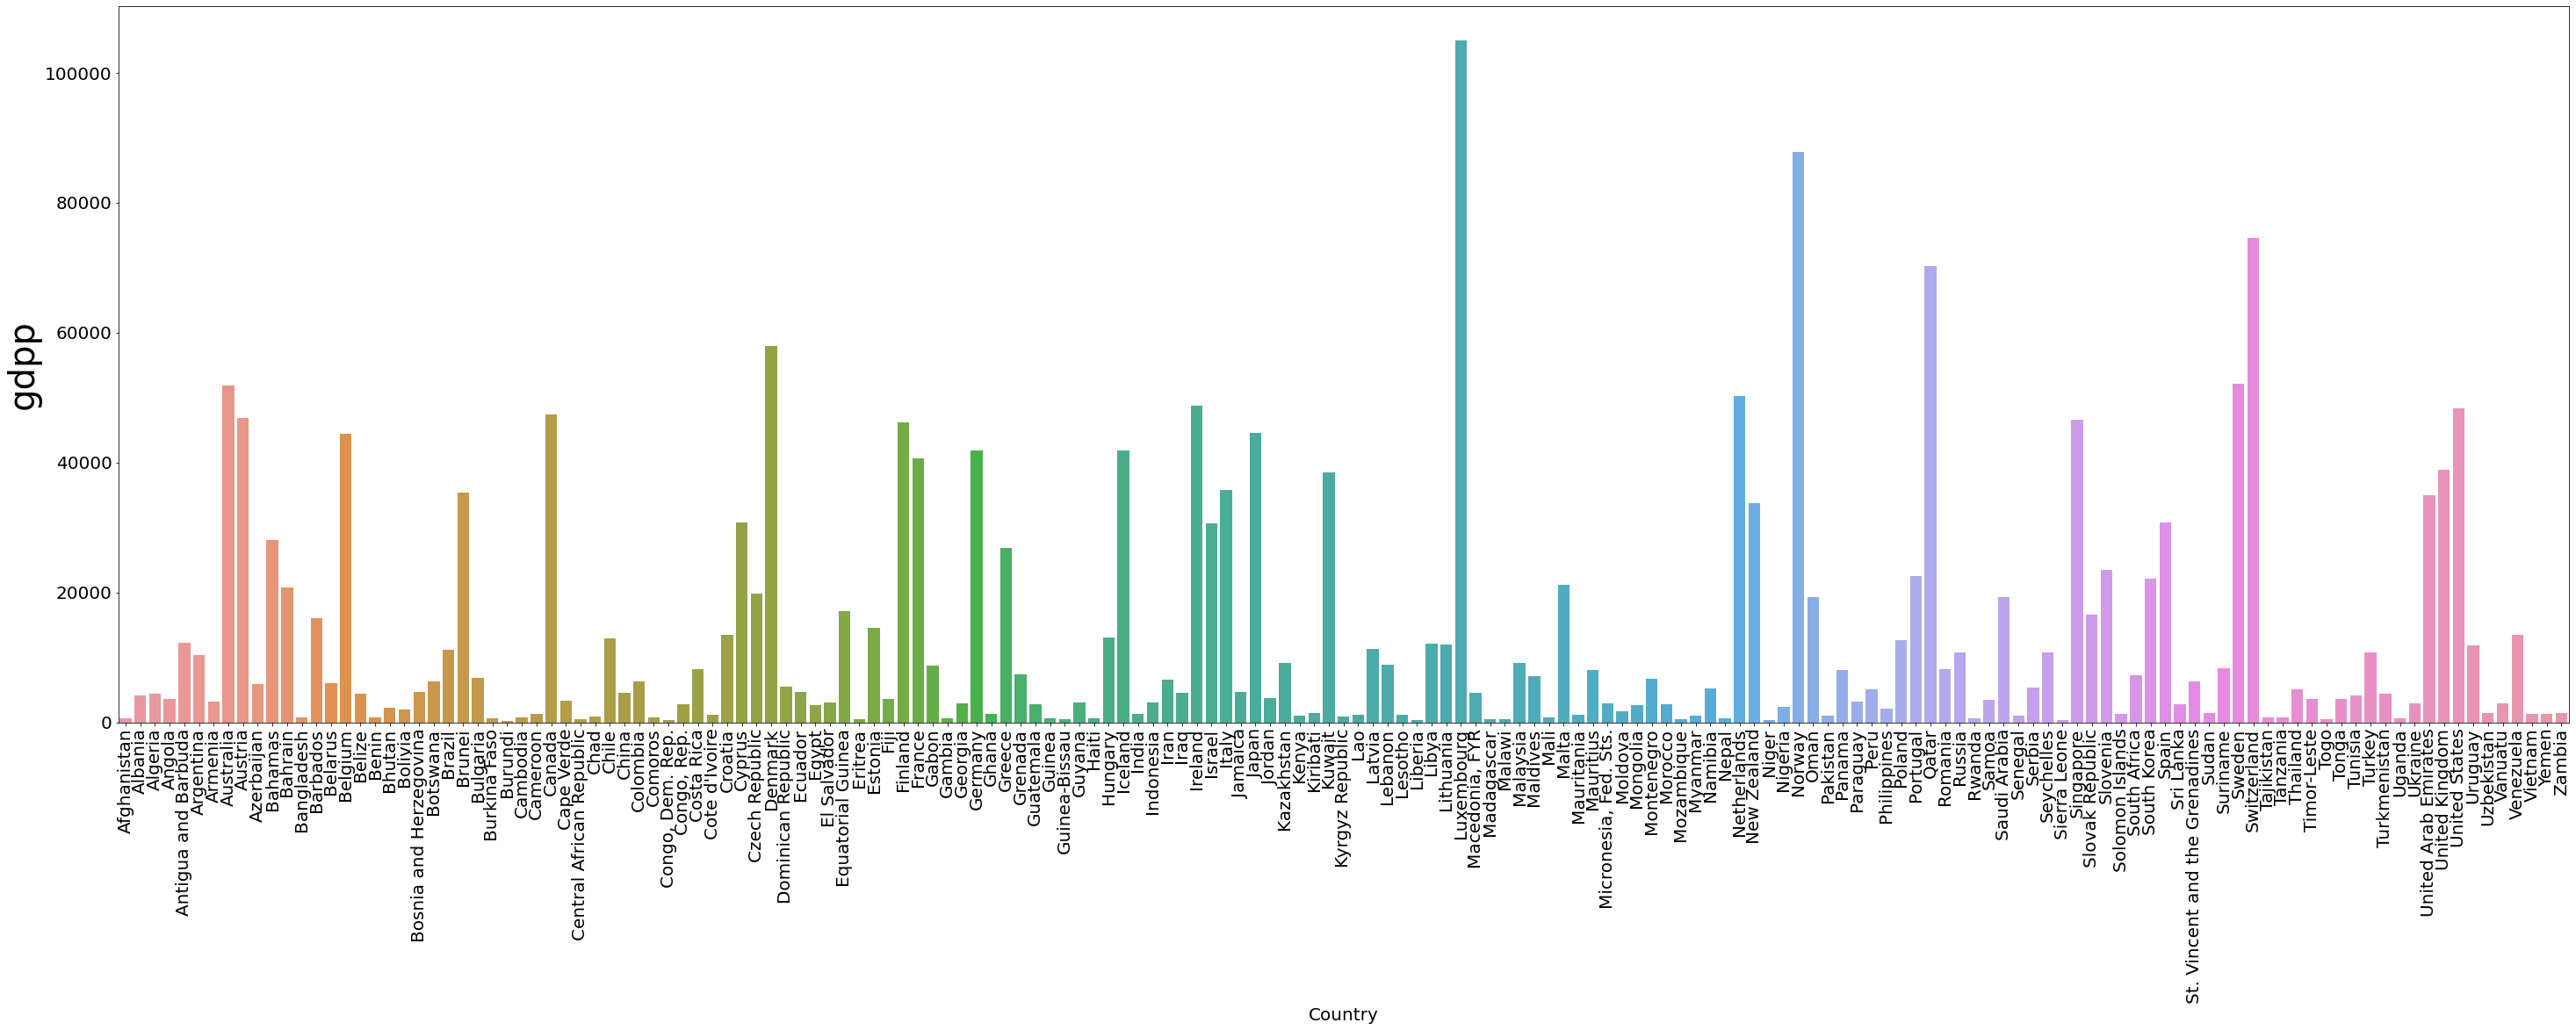

In [140]:
#Bi-Variant Analysis (Country with other variables)

col = df.columns[1:] #pick all cols except country

for i in col:
    plt.figure(figsize = (50,15)) 
    sns.barplot(x='country',y=i,data=df) #ploting country vs other variable 
    plt.xticks(rotation=90, fontsize=20)
    plt.xlabel('Country', fontsize=20)
    plt.ylabel(i, fontsize=40)
    plt.yticks(fontsize=20)
    plt.show()
    

### <font color=Red> INFERENCE
    -The 3 countries with highest chil_mort are : Haiti,Sierra Leone, Cenral Afrcan Republic, this suggests that they could be countries that are not doing well.
    -Luxembourg has the highest exports and imports, this about 40% more than next highest Singapore (both export and import) these have good trade, they seem to be      doing good. 
    -United States, Norway, Luxembourg and Sweden spend most on health which could indicate that they have good health care.
    -Qatar and Luxembourg have the highest income, these are countries that are doing well.
    -Ireland, Chez Republic, Latvia, Japan, Sierra Leone and Solomon Island have negative inflation and Nigeria, Mongolia and Venezuela have highest Inflation.
    -life_expec for most countries lie between 85 to 70, Haiti has the lowest life_expec of 30.
    -Niger has the highest total_fer
    -GDPP of Luxembourg, Norway, Sweden and Switzerland is the highest


<Figure size 720x1440 with 0 Axes>

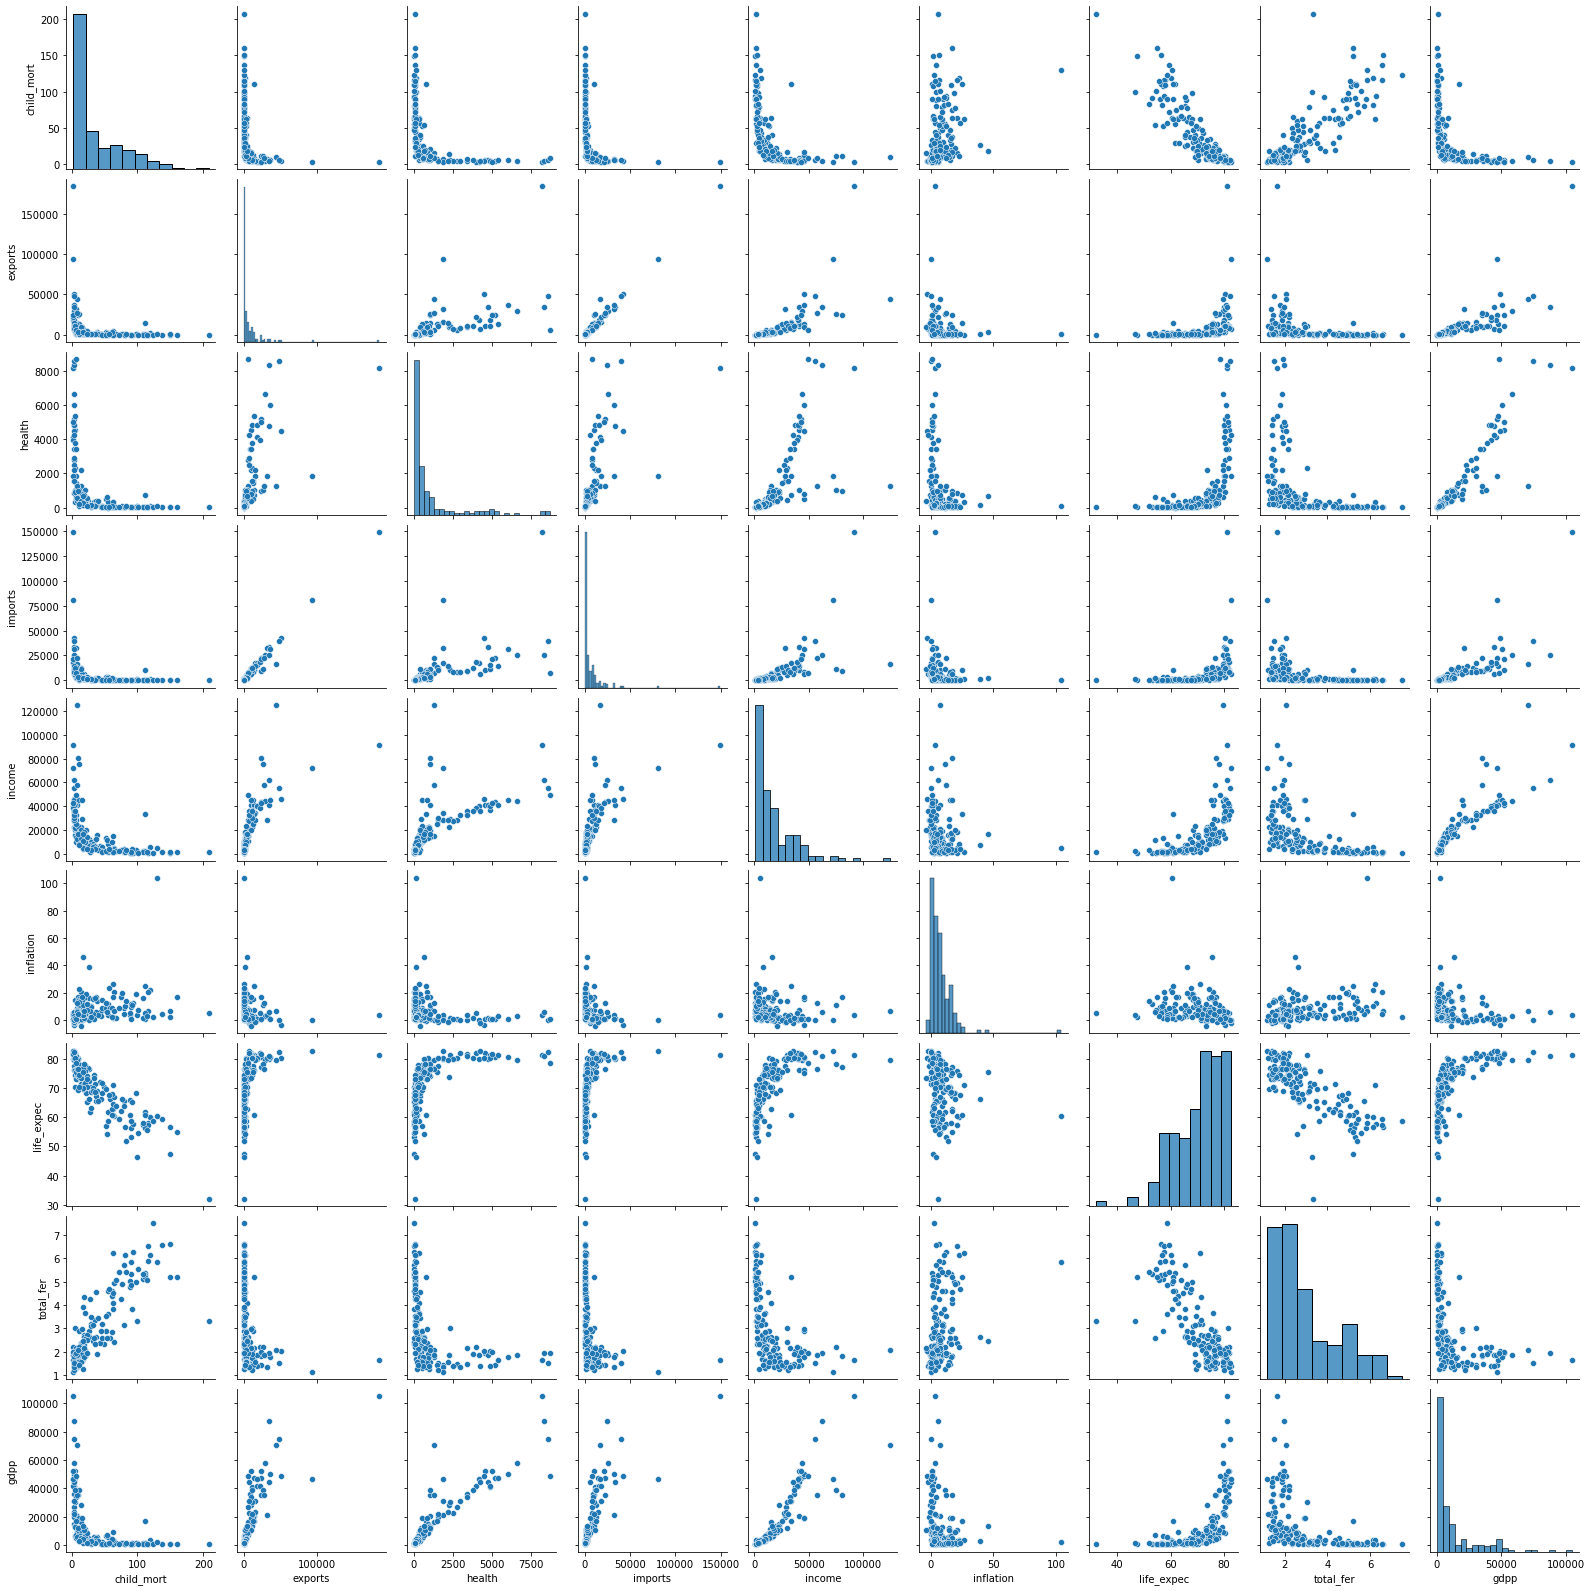

In [141]:
#multivariant Analysis 

plt.figure(figsize = (10,20))
sns.pairplot(df) #pairplot to check all the varibales against the rest to understand data

### <font color=Red> INFERENCE
    -> It is observed that child_mort has inverse correlation with life_expec, direct correlation with total_fer and it also moderately co-related to iflation.
    -> export is correlated to health, imports, income and gdpp
    -> income is correlated to exports, health, imports and GDPP
    -> gdpp is coreelated to exports, imports, health, income

 ## 3. Outlier analysis

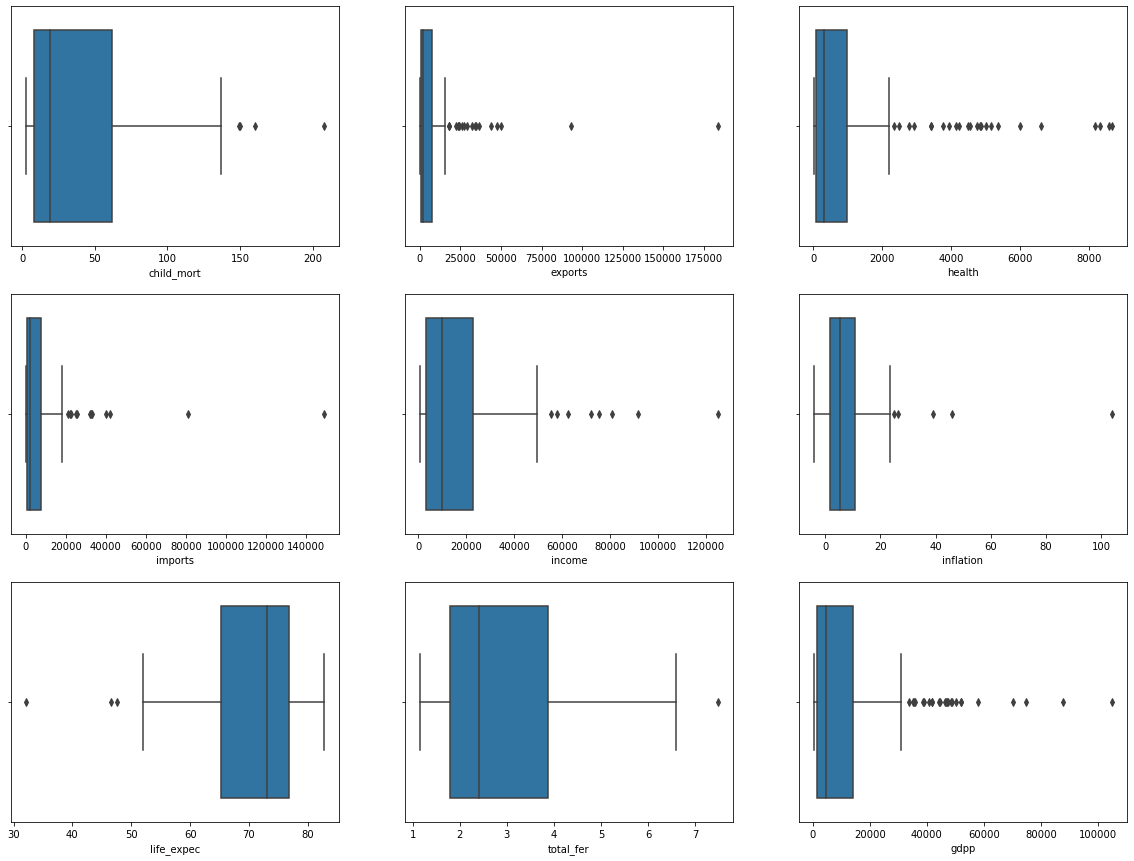

In [142]:
# Box plot to identify the outliers
plt.figure(figsize=(20, 15))
for i in enumerate(col):
    plt.subplot(3,3,i[0]+1) #subplots
    sns.boxplot(x = i[1], data = df) #boxplot for each

### <font color=Red> INFERENCE
    -> we can see that only life_expex has lower range outliers
    -> gdpp and  health have the maximum ouliers
    -> the upper range outliers for 'exports','health','imports','income','life_expec','total_fer' and 'gdpp' would not affect our final solution much as these are the countries that would be doing well, and we need to find the countries that requies AID.
    -> countries with lower child_mort and inflation would be countries whcih are doing better, hence the lower rnage outlier for these would not affect much. 
    -> There are no lower end outliers for child_mort and inflation.
    
    
    

In [143]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Treating Outliers

Dropping the outliers would not be a wise decsion as we have a small data and we need to consider all countries.

Hence, we will use capping to treat outliers, we would use 95% percentile to cap upper range outliers.
This would not affect the data much, we will treat the outliers based on the problem statement.

Since the objective is to find the Countries that are in need of financial AID, we can cap the outliers for the Countries that have higher gdpp, income, exports, imports and health as these are essentially rich countries that will not need aid, and hence we cap upper range.
Also, we could cap lower end outliers for child_mort and inflation.

Capping the Outliers:

- Child_Mort, Inflation: We should not deal with upper range outliers but we deal with lower range outliers.
- But for rest of the columns we should ignore the lower range outliers but we treat upper range outliers.

However, there are no lower range outliers for child_mort or inflation.
Hence we will perform only upper range capping.

In [144]:
#uppper range capping variables

up_cap = ['exports',
 'health',
 'imports',
 'income',
 'life_expec',
 'total_fer',
 'gdpp']


In [145]:
# capping outliers in the upper range
for var in up_cap:
    q4 = df[var].quantile(0.95) #choosing the 90th range as the outloers are many
    df[var][df[var]>=q4] = q4 #assigning q4 to all values above q4
    
   

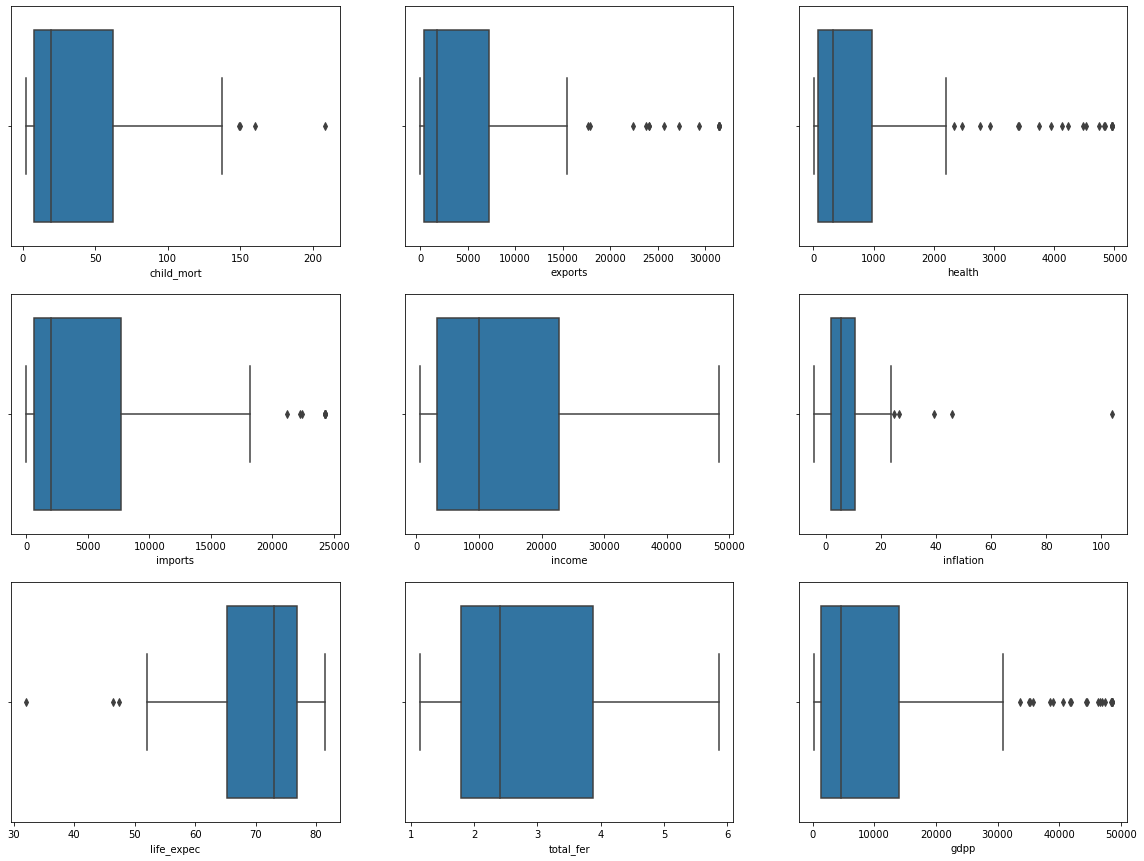

In [146]:
# Box plot after capping
plt.figure(figsize=(20, 15))
for i in enumerate(col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = df)

### <font color=Red> INFERENCE
    -> Although, there  are outliers left for all columns except income and total_fer, the outliers have considerably reduced 
    -> We will not treat these outliers as they are essential for business needs and these point could themselves form a cluster.
    -> Treating the outliers further would lead to our data being changed and affecting our final solution.
    
    
    

In [147]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,5783.114656,954.012480,5140.089474,15738.760479,7.781832,70.522156,2.917479,11998.826347
std,40.328931,8580.053847,1453.426636,6696.210005,14787.154215,10.570704,8.850052,1.443771,15158.213199
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,31385.100000,4966.701000,24241.560000,48290.000000,104.000000,81.400000,5.861000,48610.000000


## 4. Preparing data for modelling

## Hopkins

In [148]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [149]:
hopkins(df.drop('country', axis =1)) #hopkins score

0.8839655512092169

### <font color=Red> INFERENCE

hopkins score of above 80 is considered good score modelling

## Scaling

In [150]:
#performing standardscalling to get data to same scale
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = ss.fit_transform(df.drop('country', axis = 1))
df_scaled

array([[ 1.29153238, -0.66958102, -0.62943544, ..., -1.62318027,
         2.01642065, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348864, ...,  0.65482341,
        -0.88053487, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.01909006, -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.6721208 , -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153387, ..., -0.34251153,
         1.21750006, -0.70727157],
       [ 1.11495062, -0.61289625, -0.59901824, ..., -2.09918104,
         1.72464096, -0.69734618]])

In [151]:
df_scaled = pd.DataFrame(df_scaled)#converting array to dataframe 
df_scaled.columns = df.columns[1:] #assigning column names
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


In [152]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,-1.249832e-16,1.063687e-17,2.592736e-17,7.977650e-18,1.063687e-16,-6.435305e-16,3.456982e-17,4.520669e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-6.759197e-01,-6.495147e-01,-7.698228e-01,-1.026246e+00,-1.137852e+00,-4.354518e+00,-1.227892e+00,-7.786682e-01
25%,-7.466190e-01,-6.237750e-01,-6.041653e-01,-6.740243e-01,-8.399862e-01,-5.666409e-01,-5.918453e-01,-7.798014e-01,-7.059482e-01
50%,-4.717981e-01,-4.682630e-01,-4.362295e-01,-4.635184e-01,-3.919713e-01,-2.269504e-01,2.921562e-01,-3.525526e-01,-4.856046e-01
75%,5.926666e-01,1.747520e-01,1.582225e-02,3.863780e-01,4.789614e-01,2.816364e-01,7.114902e-01,6.686764e-01,1.357246e-01
max,4.221297e+00,2.992870e+00,2.769150e+00,2.861159e+00,2.207939e+00,9.129718e+00,1.232824e+00,2.044904e+00,2.422534e+00


## Hopkins on scaled data

In [153]:
hopkins(df_scaled) #hopkins score

0.8825236234606458

### <font color=Red> INFERENCE

Hopkins score of above 80 is considered good score modelling.   
Both scaled and unscaled data have score more than 80 and its good for modelling

# 5. Modelling

# <font color= blue> KMeans Clustering

## Silhouette Analysis 
(Performed to check the optimal k value)

In [154]:

# Silhouette Score

from sklearn.metrics import silhouette_score
sil = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    sil.append([k, silhouette_score(df_scaled, kmean.labels_)])

sil =pd.DataFrame(sil)
sil#check the Silhouette k and its score

,0,1
0,2,0.493328
1,3,0.433643
2,4,0.437215
3,5,0.410475
4,6,0.320562
5,7,0.303044
6,8,0.301470
7,9,0.300159


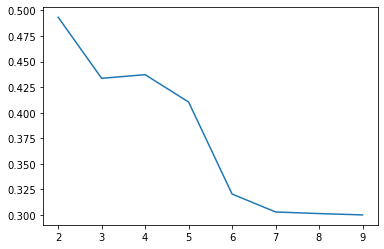

In [155]:
plt.plot(sil[0], sil[1]) # ploting the graph

## Elbow curve
(Performed to check the optimal k value)

In [156]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
ssd #check the curve values



,0,1
0,2,766.716174
1,3,485.620658
2,4,406.231358
3,5,327.715574
4,6,282.950531
5,7,254.022463
6,8,230.205993
7,9,206.740147
8,10,187.121517


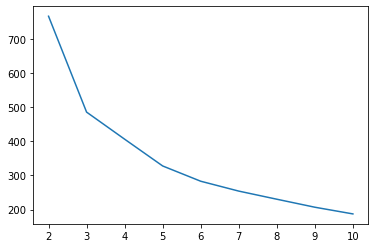

In [157]:
plt.plot(ssd[0], ssd[1]) #plotting elbow curve 

### <font color=Red> INFERENCE  
- Although the maximum sccore is for k=2, it is not ideal to pick k=2 for buisness perpose, the data would be split into 2 halves and not give us much insight.    
- The siloutte score is maximum at k=3 and k=4
- The first elbow is at 3 and then at 4 and 5
- For our probelm statement 5 clusters is not ideal.
- We will go with k=3, as this is our optimal k value.
- We will check k=4 as well for comparision.

## <font color=purple>KMean with K=3

In [158]:
kmean = KMeans(n_clusters = 3, random_state = 0) #applying k-means with k=
kmean.fit(df_scaled) #fit to the dataframe

KMeans(n_clusters=3, random_state=0)

In [159]:
kmean.labels_ #checking the labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [160]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200


In [161]:
## Adding the labels with the original DF
df['cluster_id'] = kmean.labels_

In [162]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


In [163]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

0    82
1    48
2    37
Name: cluster_id, dtype: int64

##### 3 cluters are formed with labels 0,1,2 

## Plotting the cluster WRT to the data

- GDPP
- Income
- Child_Mort

<AxesSubplot:xlabel='gdpp', ylabel='income'>

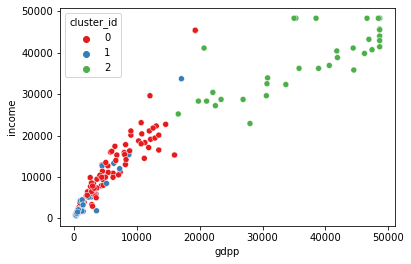

In [164]:
#scatter plot GDPP vs INCOME 

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 3 clusters. 
    Points with lower gdpp and lower income forms cluster 1.
    Points with highest gdpp and highest income forms cluster 2.
    Points with gdpp between 2000 to 18000 and income between 2000 and 2700 forms cluster 0.

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

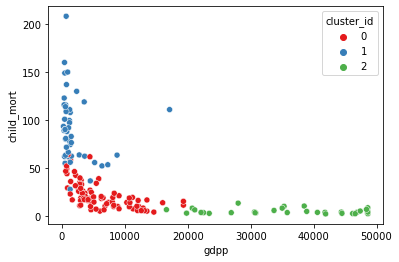

In [165]:
# scatter plot GDPP vs Child_mort 

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 3 clusters
    Points with higher child_mort and lower gdpp belong to cluster 1
    Points with child_mort below 50 and gdpp bleow 1500 belong to cluster 0
    Points with lower child_mort and gdpp more than 2000 blong to cluster 2

<AxesSubplot:xlabel='child_mort', ylabel='income'>

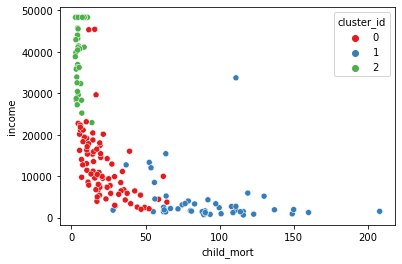

In [166]:
# scatter plot Child_mort vs INCOME 

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 3 clusters
    Points with higher child_mort and lower income belong to cluster 1
    Points with child_mort below 50 and income below 2000 belong to cluster 0
    Points with higher income (more than 2000) and lower child_mort belong cluster 2 

## Cluster Profiling

- GDPP
- Income
- Child_Mort

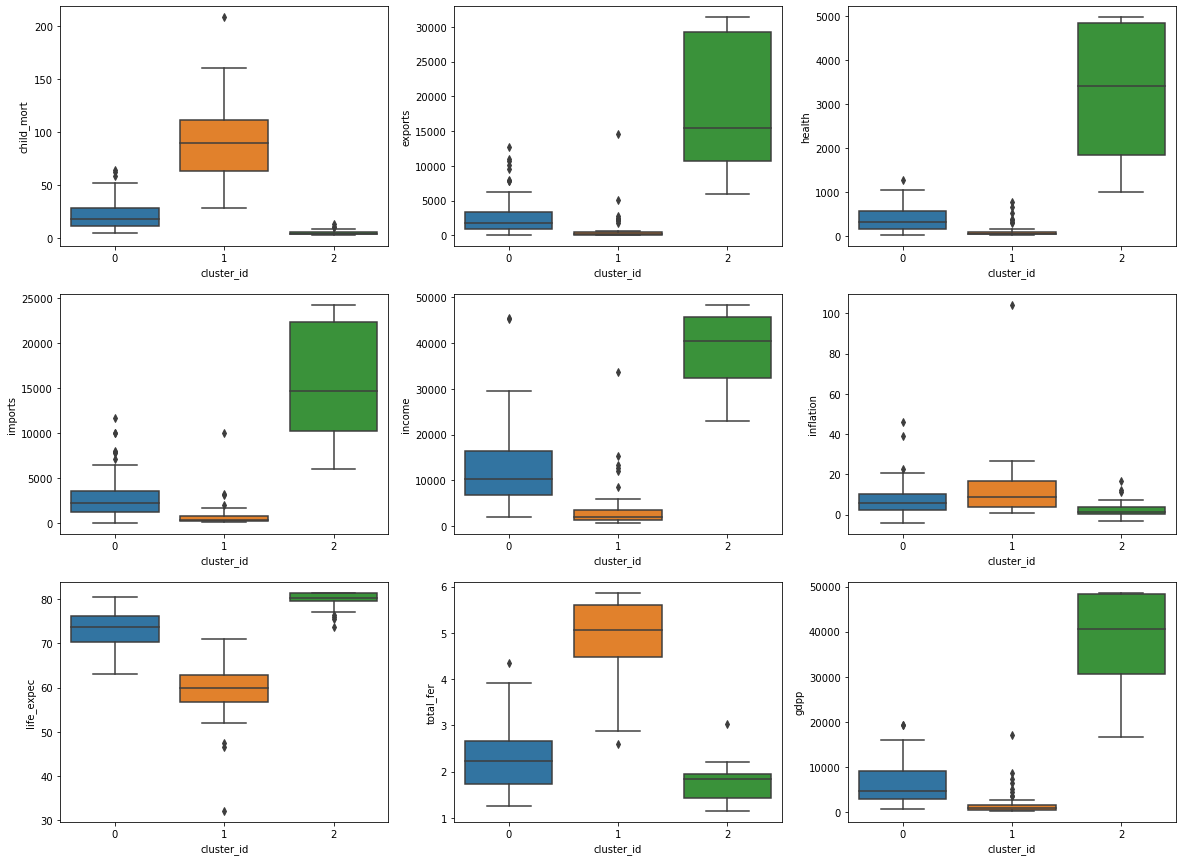

In [167]:
# plots the distribution of the feature for different clusters
var=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20, 15))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id', y=i[1], data=df)

In [168]:
## Checking mean values of the clusters
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean()



,gdpp,income,child_mort
cluster_id,,,
0,6287.463415,12304.756098,21.951220
1,1909.208333,3897.354167,91.610417
2,37745.675676,38711.081081,5.237838


In [169]:
#annotation with count of variable
def ann_count(df):
    for q in df.patches:
        df.annotate(format(q.get_height(), '.1f'), 
                   (q.get_x() + q.get_width() / 2., q.get_height()), 
                   ha = 'center', va = 'center', rotation=90,
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
        

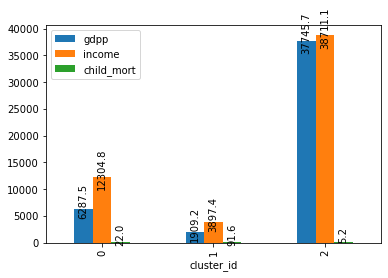

In [170]:
#bar graph with the mean values of the 3 vaiables

p=df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')
ann_count(p)
plt.show()

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 3 clusters
    cluster 0-> Developing Countries
    cluster 1-> Under developed countries
    cluster 2-> Developed Countries
    
    The Countries that need AID would be in cluster 1 (Under Developed Countries)
    

## Find the top 10 countries that requires AID

In [171]:
c = df[df['cluster_id']==1]  #check data points of cluster 1

In [172]:
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
#top 10 countries that need AID


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,1


In [173]:
#list of countries
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10).country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

## <font color=purple> KMean with K=4

In [174]:
kmean_f = KMeans(n_clusters = 4, random_state = 0) #clustering with k=4
kmean_f.fit(df_scaled) #fit the df to get clusters

KMeans(n_clusters=4, random_state=0)

In [175]:
kmean_f.labels_ #cluster labels

array([1, 0, 0, 1, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       3, 0, 0, 0, 0, 1, 1, 2, 0, 3, 2, 1, 1, 0, 3, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 3, 0, 0, 0, 1, 3, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 2, 1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [176]:
## Adding the labels with the original DF
df['cluster_id'] = kmean_f.labels_

In [177]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


In [178]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

0    78
1    48
2    24
3    17
Name: cluster_id, dtype: int64

### Plotting the cluster WRT to the data

- GDPP
- Income
- Child_Mort

<AxesSubplot:xlabel='gdpp', ylabel='income'>

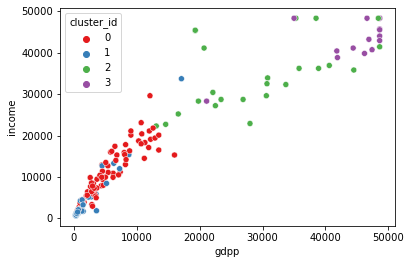

In [179]:
#GDPP vs INCOME 

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Points with highest income and gdpp falls in cluster 3, as the value dcreses for both they fall in different clusters 2,1,0 respectively.

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

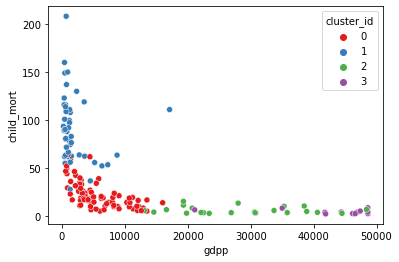

In [180]:
#GDPP vs Child_mort 

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 3 clusters
    Points with higher child_mort and lower gdpp belong to cluster 1
    Points with child_mort below 50 and gdpp bleow 1500 belong to cluster 0
    Points with higher gdpp and lower chil_mort falls in cluster 2 and then 3 as the gdpp increases

<AxesSubplot:xlabel='child_mort', ylabel='income'>

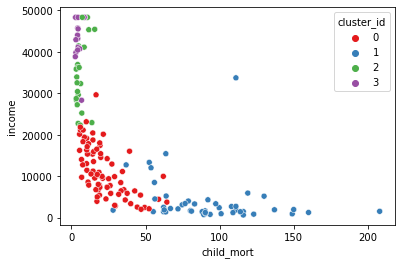

In [181]:
#Child_mort vs INCOME 

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Points with higher child_mort and lower income belong to cluster 1
    Points with child_mort below 50 and income below 2000 belong to cluster 0
    Points with higher income (more than 2000) and lower child_mort belong cluster 2 and cluster 3

## Cluster Profiling

- GDPP
- Income
- Child_Mort

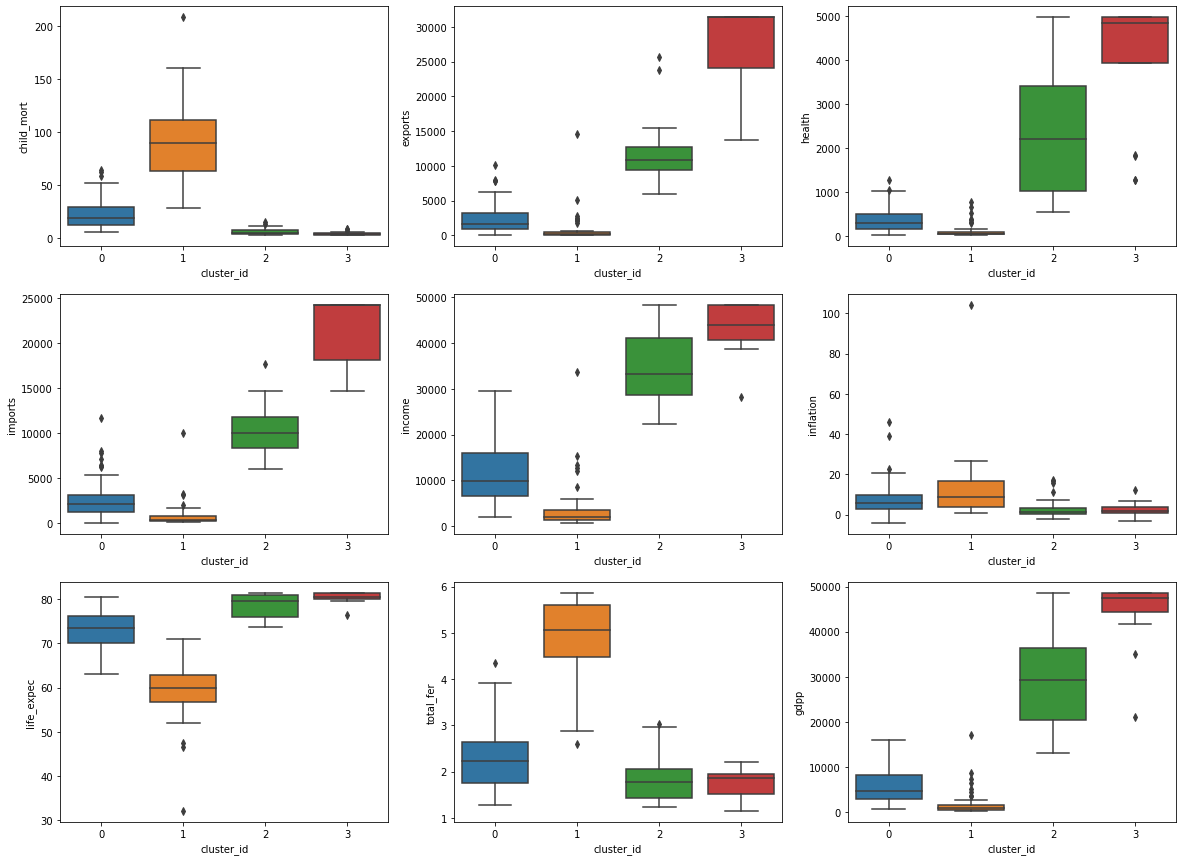

In [182]:
# plots
var=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20, 15))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_id', y=i[1], data=df)

In [183]:
df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean()
#Mean of the 3 variables for each clusters


,gdpp,income,child_mort
cluster_id,,,
0,5759.897436,11196.025641,22.591026
1,1909.208333,3897.354167,91.610417
2,29279.583333,34494.583333,6.416667
3,44716.470588,43537.647059,4.570588


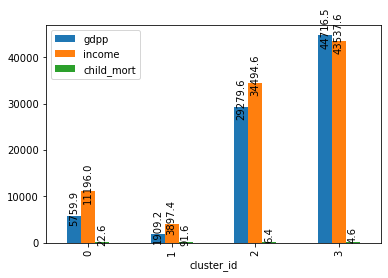

In [184]:
p=df[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind='bar') #plot graph of clusters with mean of the 3 variables 
ann_count(p) #annot
plt.show() #plot

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Cluster 0-> Moderately Developed Country
    Cluster 1-> Under Developed Country
    Cluster 2-> Developing Country
    Cluster 3-> Developed Country
    
    COUNTRIES THAT NEED AID IS CLUSTER 1

## Find the top 10 countries that requires AID

In [185]:
c1 = df[df['cluster_id']==1] #choose only cluster points with ID 1

In [186]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10) #Show the top 10 countries that need AID



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,1
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,1


In [187]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10).country
#list of countries

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

### <font color=Red><u> K-MEANS CLUSTER WITH K=3 GIVES US BETTER RESULT AND DISTRIBUTION OF DATA INTO 3 CLUSTERS  


# <font color=Blue> HIRECHICAL CLUSTERING

In [188]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


## <font color=purple> Single Linkage

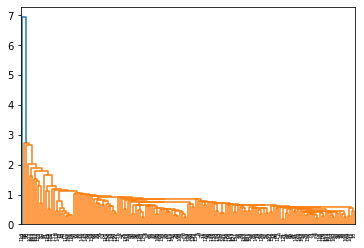

In [189]:
# single linkage- Hirechical clustering 
mergings = linkage(df_scaled, method="single", metric='euclidean') #single linkage with euclidean distance 
dendrogram(mergings)
plt.show() #ploting the dendogram for single linkage

Single linkage doesn't give a good distribution data, however we will still proceed and check

In [190]:
# 3 clusters gives us better clustering based on the dendogram
cluster_label_s = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_label_s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [191]:
# assign cluster labels
df['cluster_label_s'] = cluster_label_s
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label_s
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,0


In [192]:
df['cluster_label_s'].value_counts() #check the cluster distribution 

0    165
2      1
1      1
Name: cluster_label_s, dtype: int64

### <font color=Red> INFERENCE  
    The cluster distribution is not good, as 2 clusters have only 1 point.

### Plotting the cluster WRT to the data

- GDPP
- Income
- Child_Mort

<AxesSubplot:xlabel='child_mort', ylabel='income'>

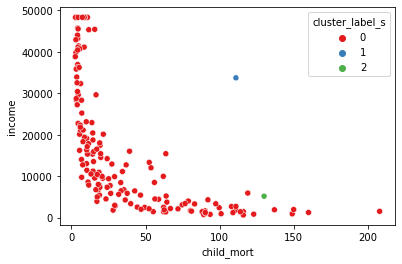

In [193]:
#Child_mort vs INCOME 

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_label_s', data = df, palette ='Set1')

<AxesSubplot:xlabel='gdpp', ylabel='income'>

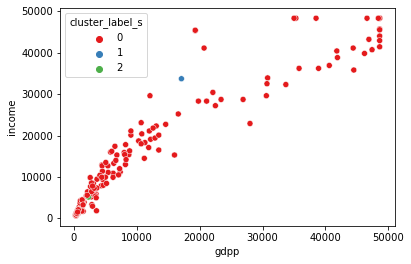

In [194]:
#GDPP vs INCOME 

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_label_s', data = df, palette ='Set1')

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

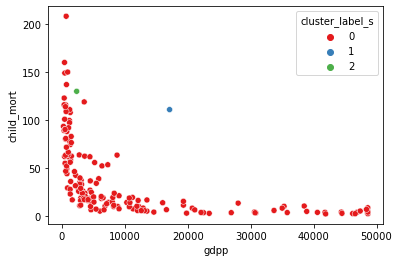

In [195]:
#GDPP vs Child_mort 

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_label_s', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    The cluster distribution is not good, as 2 clusters have only 1 point.
    Due to which all our plots of cluster 0 and only 1 each for cluster 1 and cluster 2

## Cluster Profiling

- GDPP
- Income
- Child_Mort

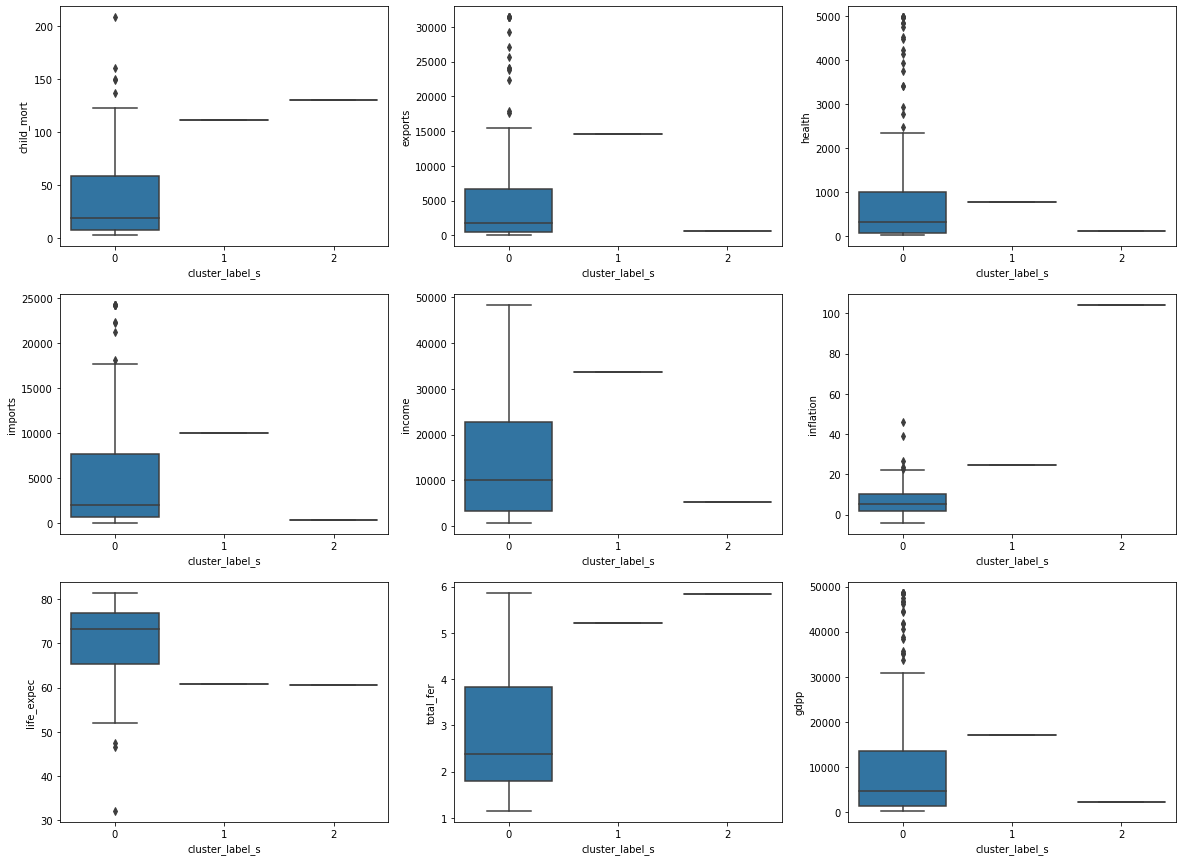

In [196]:
# plots
var=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20, 15))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_label_s', y=i[1], data=df)

In [197]:
p=df[['gdpp', 'income', 'child_mort','cluster_label_s']].groupby('cluster_label_s').mean()

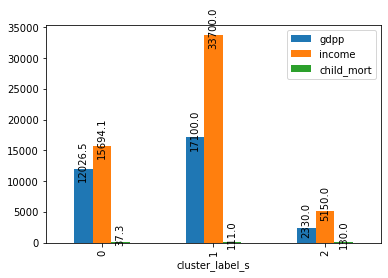

In [198]:
#ploting bar graph to show the clusters formed with thier mean values
p=df[['gdpp', 'income', 'child_mort','cluster_label_s']].groupby('cluster_label_s').mean().plot(kind='bar') 
ann_count(p) #annote
plt.show() # plot

## Find the top 10 countries that requires AID

In [199]:
c = df[df['cluster_label_s']==2] #CHOOSING CLUSTER 2 POINTS ONLY

In [200]:
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
#country that require aid


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label_s
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330,1,2


### <font color=Red> INFERENCE  
    The cluster distribution is not good, as 2 clusters have only 1 point.
    And we have only 1 Country in the cluster which needs aid 
    
##   <font color=red> <u> SINGLE LINKAGE HIRECHICAL CLUSTER IS NOT A GOOD OPTION

## <font color=purple> Complete Linkage

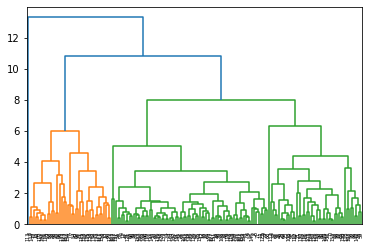

In [201]:
# complete linkage- Hirechical Clustering 
mergings_c = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show() #plot the dendogram 

## complete linkage is looking better 

In [202]:
# 3 clusters gives us better clustering based on the dendogram
cluster_labels = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [203]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
#df.drop(['cluster_id','cluster_label_s'],inplace=True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label_s,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,0,1


In [204]:
df['cluster_labels'].value_counts() #cluster distribution

1    78
0    47
2    41
3     1
Name: cluster_labels, dtype: int64

### Plotting the cluster WRT to the data

- GDPP
- Income
- Child_Mort

<AxesSubplot:xlabel='child_mort', ylabel='income'>

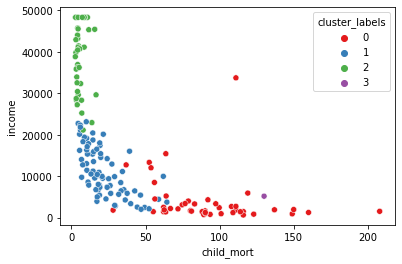

In [205]:
#Child_mort vs INCOME 

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Points with higher child_mort and lower income belong to cluster 0
    Points with child_mort below 50 and income below 2000 belong to cluster 1
    Points with higher income (more than 2000) and lower child_mort belong cluster 2
    There is only 1 point to cluster 3, this has child_mort about 125 and income 80000

<AxesSubplot:xlabel='gdpp', ylabel='income'>

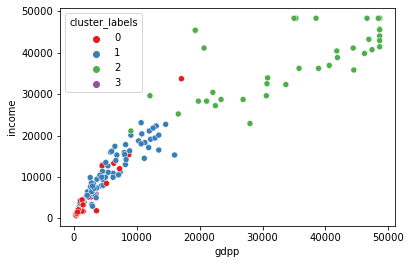

In [206]:
#GDPP vs INCOME 

sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Points with lower income and lower gdpp belong to cluster 0
    Points with income and gdpp above 5000 and below gdpp below 18000 and income 21000 fall under cluster 1
    Points with highest gdpp and income falls under cluster 2
    Cluster 3 is at 2000 gdpp and income 2000 

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

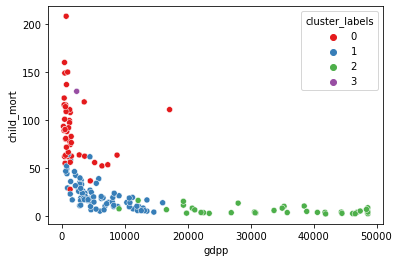

In [207]:
#GDPP vs Child_mort 

sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = df, palette ='Set1')

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Points with higher child_mort and lower gdpp belong to cluster 0
    Points with child_mort below 50 and gdpp bleow 1500 belong to cluster 1
    Points with lower child_mort and gdpp more than 2000 blong to cluster 2
    Cluster 3 has 1 point and its at child_mort arount 125-130 and gdpp around 5000-8000

## Cluster Profiling

- GDPP
- Income
- Child_Mort

In [208]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id',
       'cluster_label_s', 'cluster_labels'],
      dtype='object')

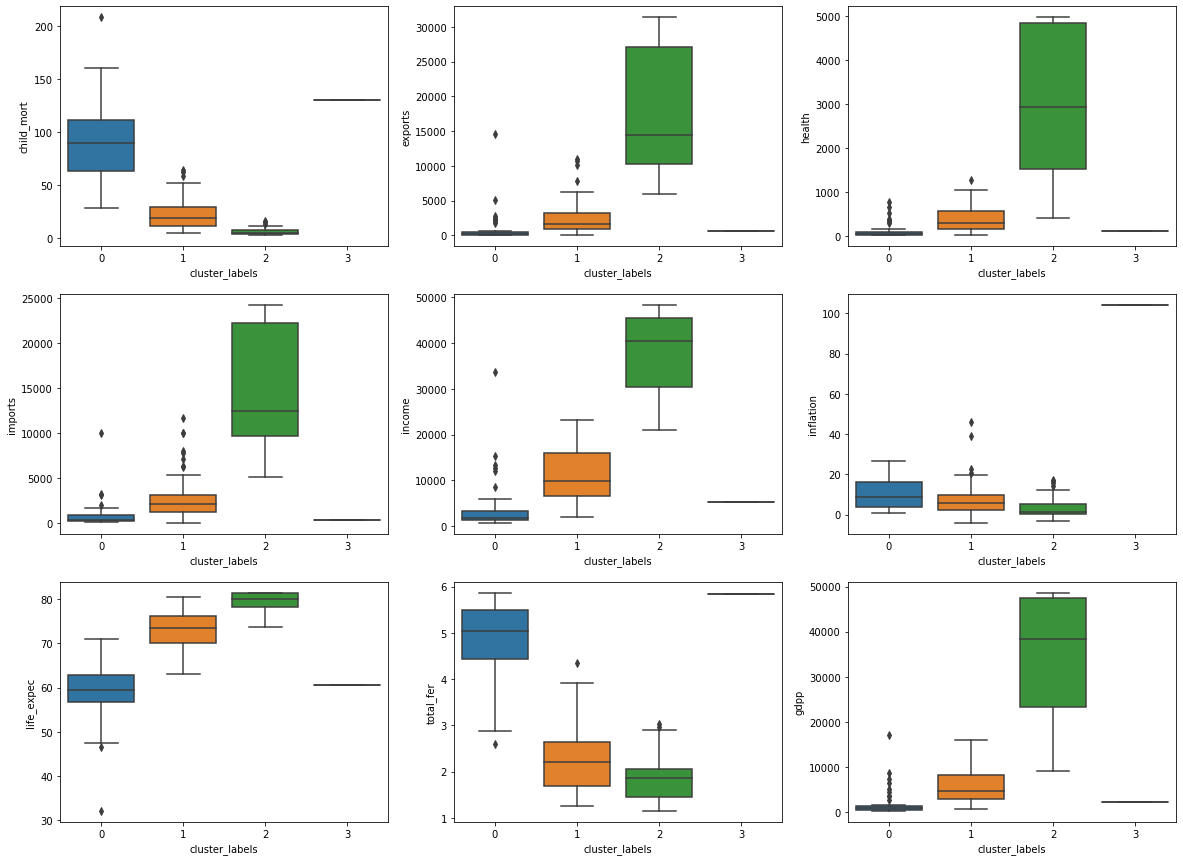

In [209]:
# plots
var=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20, 15))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x='cluster_labels', y=i[1], data=df)

In [210]:
p=df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()

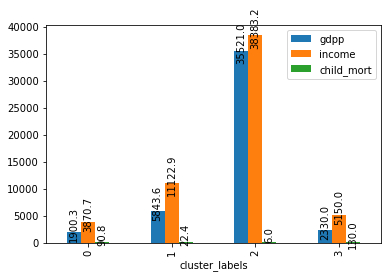

In [211]:
p=df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar')
ann_count(p)
plt.show()

### <font color=Red> INFERENCE  
    We can clearly see the ditribution of all 4 clusters
    Cluster 0-> Under Developed Country
    Cluster 1-> Developing Country
    Cluster 2-> Developed Country
    Cluster 3-> Moderately Developed Country

## Find the top 10 countries that requires AID

In [212]:
c = df[df['cluster_labels']==0] 

In [213]:
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_label_s,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,5.861,231,1,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.020,327,1,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,5.861,334,1,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,5.861,348,1,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.200,399,1,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.600,413,1,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.560,419,1,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.210,446,1,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.310,459,1,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.610,482,1,0,0


In [214]:
c.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10).country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

## <font color=purple> Based on the above models and analysis, we can conclude that the K-Means with k=3 gives us the best result with well distributed 3 clusters.
    
Although both kmeans and hirechical clustering gives same results, k means is preferred here as the ditribution of data is done well amoung clusters 
 
1.The k-means method provided us with 3 well distributed clusters, which is also optimal for the business solution.
 - cluster 0-> Developing Countries (82 countries)
 - cluster 1-> Under developed countries(42 countries)
 - cluster 2-> Developed Countries(37 countries)

2.The Hierarchical Method provided us with 4 clusters, however the data was not well distributed. Cluster 3 has only 1 data point in it, this is not the optimal solution for both business and analysis.
 - Cluster 0-> Under Developed Country (78 countries)
 - Cluster 1-> Developing Country (47 countries)
 - Cluster 2-> Developed Country (41 countries)
 - Cluster 3-> Moderately Developed Country (1 country)

THE COUNTRIES THAT REQUIRE AID ARE THE ‘UNDER DEVELOPED COUNTRIES’ FROM K-MEANS CLUSTERING METHOD


<b> The Countries in need of AID are: 

Burundi

Liberia

Congo, Dem. Rep.

Niger

Leone

Madagascar

Mozambique

Central African Republic

Malawi

Eritrea 